In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
pd.plotting.register_matplotlib_converters()
pd.options.display.float_format = '{:.2f}'.format
print('Setup Complete')

Setup Complete


In [2]:
stroke_file = 'stroke_data.csv'
df = pd.read_csv(stroke_file)
df.memory_usage(deep=True).sum()

1901849

In [3]:
#Relatively small dataset, so can use info to show full details
#BMI is only column with missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
df = df.drop('id', axis=1)

##### INSPECTION OF COLUMNS:

     id     - drop as not required 
     
     gender - NOMINAL CATEGORICAL
            - investigate if dealing with gender or biological sex
            - reclassify as a category
            
     age    - DISCRETE NUMERICAL (although technically continuous)
            - histogram and boxplot
            - create a categorical range column for data viz
            - ? reclassify as int8 or int 16 to save memory
            
     HTN    - NOMINAL CATEGORICAL
            - bar chart (countplot)
            - ? needs to be int64 if represented with 1/0
            - reclassify as category or int8 to save memory
                    
     HD     - NOMINAL CATEGORICAL
            - bar chart (countplot)
            - ? needs to be int64 if represented with 1/0
            - reclassify as category or int8 to save memory
                   
     EM     - NOMINAL CATEGORICAL
            - bar chart (countplot)
            - check the categories (likely Y/N)
            - reclassify as a category for data viz
                   
     RT     - NOMINAL CATEGORICAL
            - bar chart (countplot)
            - change to lower case for attribute access
            - reclassify as a category
                 
     AGL    - CONTINUOUS NUMERICAL
            - histogram and boxplot
            - ? needs to be float64
            - reclassify as float32 or 16 to save memory
             
     BMI    - CONTINUOUS NUMERICAL
            - histogram and boxplot
            - investigate missing values and how to fill
            - ? needs to be float64
            - reclassify as float32 or 16 to save memory    
            
     STROKE - NOMINAL CATEGORICAL
            - bar chart (countplot)
            - ? needs to be int64 if represented with 1/0
            - reclassify as category or int8 to save memory
           

## HYPOTHESES ABOUT THE DATASET:

- That there will be a higher propertion of strokes in older adults
- There may be a correlation with heart disease, hypertension and diabetes with stroke, as they are lifestyle diseases that increase in prevalence with age
- That there may be a correlation between smoking and heart disease, hypertension and diabetes, as smoking is already known to cause these conditions

- It may not be possible to see correlation between marital status or employment and stroke

##### FORESEABLE ISSUES WITH THE DATA SET: 

- The dataset is small and with only a small percentage of the data having had a stroke
- It is not clear where or when the data was collected, so it is difficult to compare the ratios to national averages from specific time periods
- It is unclear if the age recorded is the age at which the person had a stroke or the age they were when the data was collected
- There is no information on ethnicity, and stroke prevalence is higher in certain ethnic groups
- Marital status and employment status may be better recorded as average household income for future data sets. Marriage is less common in today's society and employment status must be combined with other factors as a proxy for socioeconomic deprivation 

### EXPLORATORY DATA ANALYSIS:

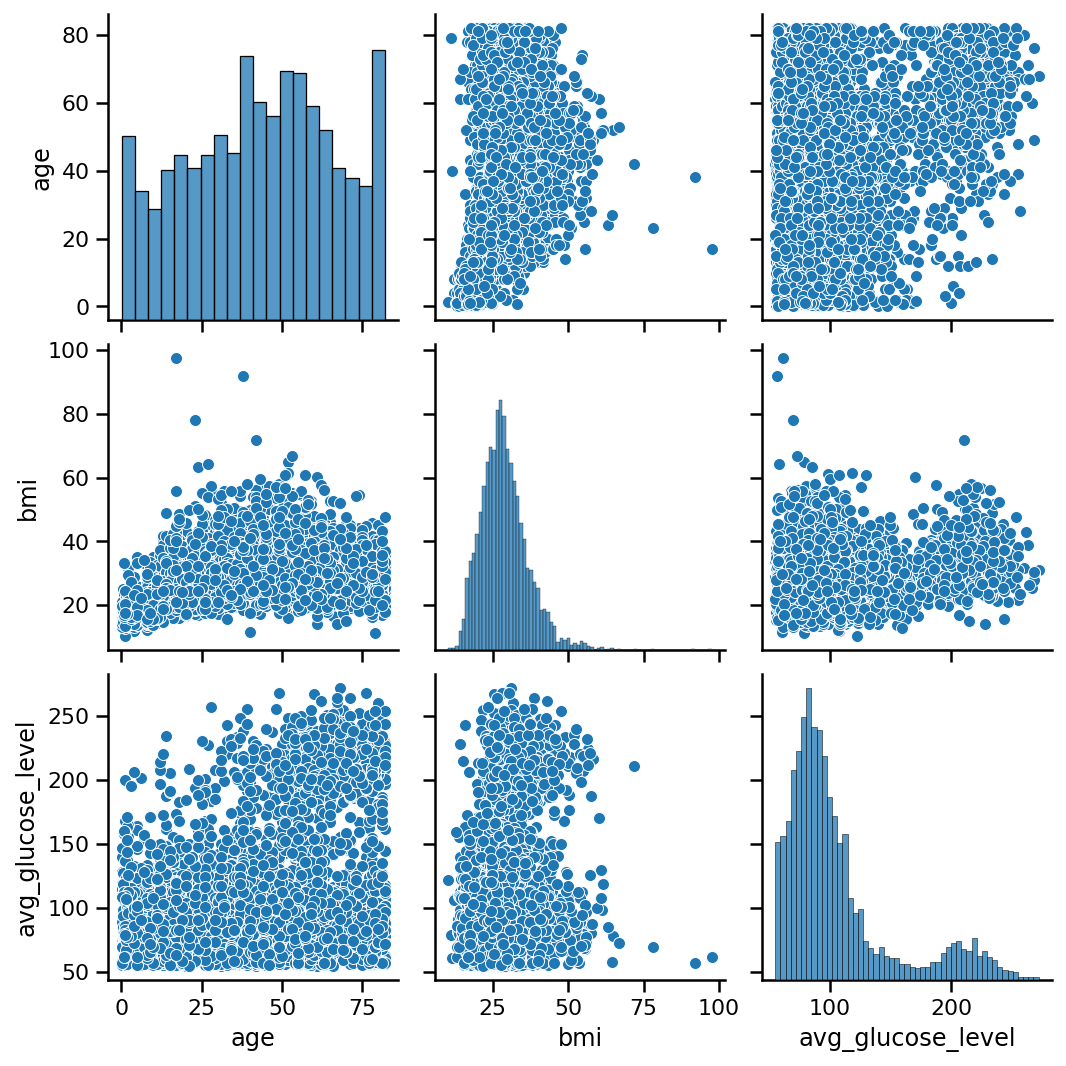

In [5]:
#Only useful to show numeric variables (except id)
#Not useful for binary catgoricals
sns.pairplot(data=df[['age', 'bmi', 'avg_glucose_level']])
plt.show()

### OVERVIEW OF STROKE VS NON-STROKE IN DATSET:

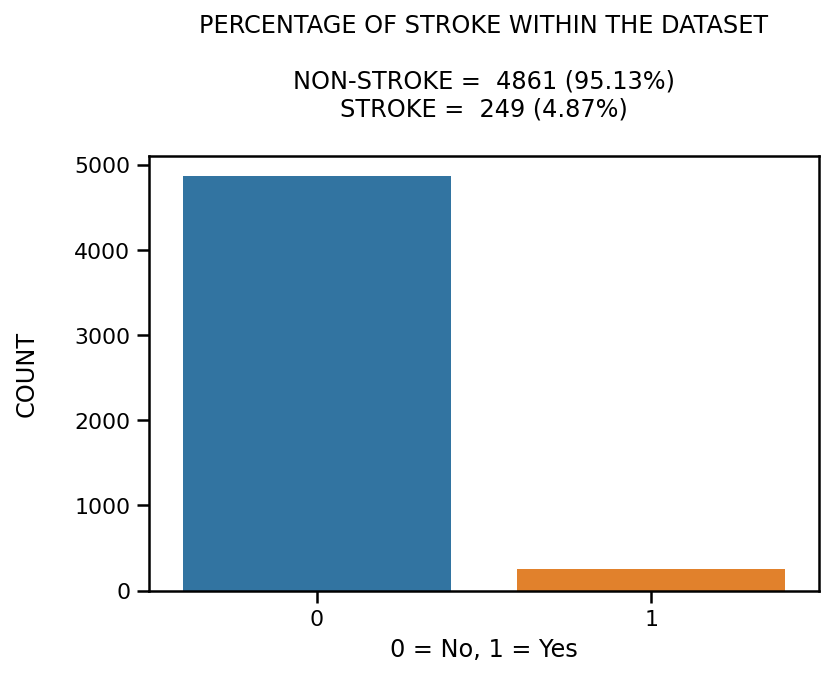

In [11]:
sns.countplot(x='stroke', data = df)
plt.xlabel('0 = No, 1 = Yes')
plt.ylabel('COUNT\n')
plt.title('PERCENTAGE OF STROKE WITHIN THE DATASET\n\n'
         f'NON-STROKE =  {df.stroke.value_counts()[0]} '
         f'({(df.stroke == 0).mul(100).mean():.2f}%)'
         f'\nSTROKE =  {df.stroke.value_counts()[1]} '
        f'({(df.stroke == 1).mul(100).mean():.2f}%)\n')
plt.show()

### MULTIVARIATE ANALYSIS FOR NUMERIC VARIABLES:

- Dataset has three numeric variables
- Age is a continuous variable, often represented as discrete variable
- Other variables are categorical (work_type, smoking_status, gender)
- Or binary categorical (heart_disease, hypertension, ever_married, residence_type)

- Correlations between the binary categoricals should be visualized via contingency tables 

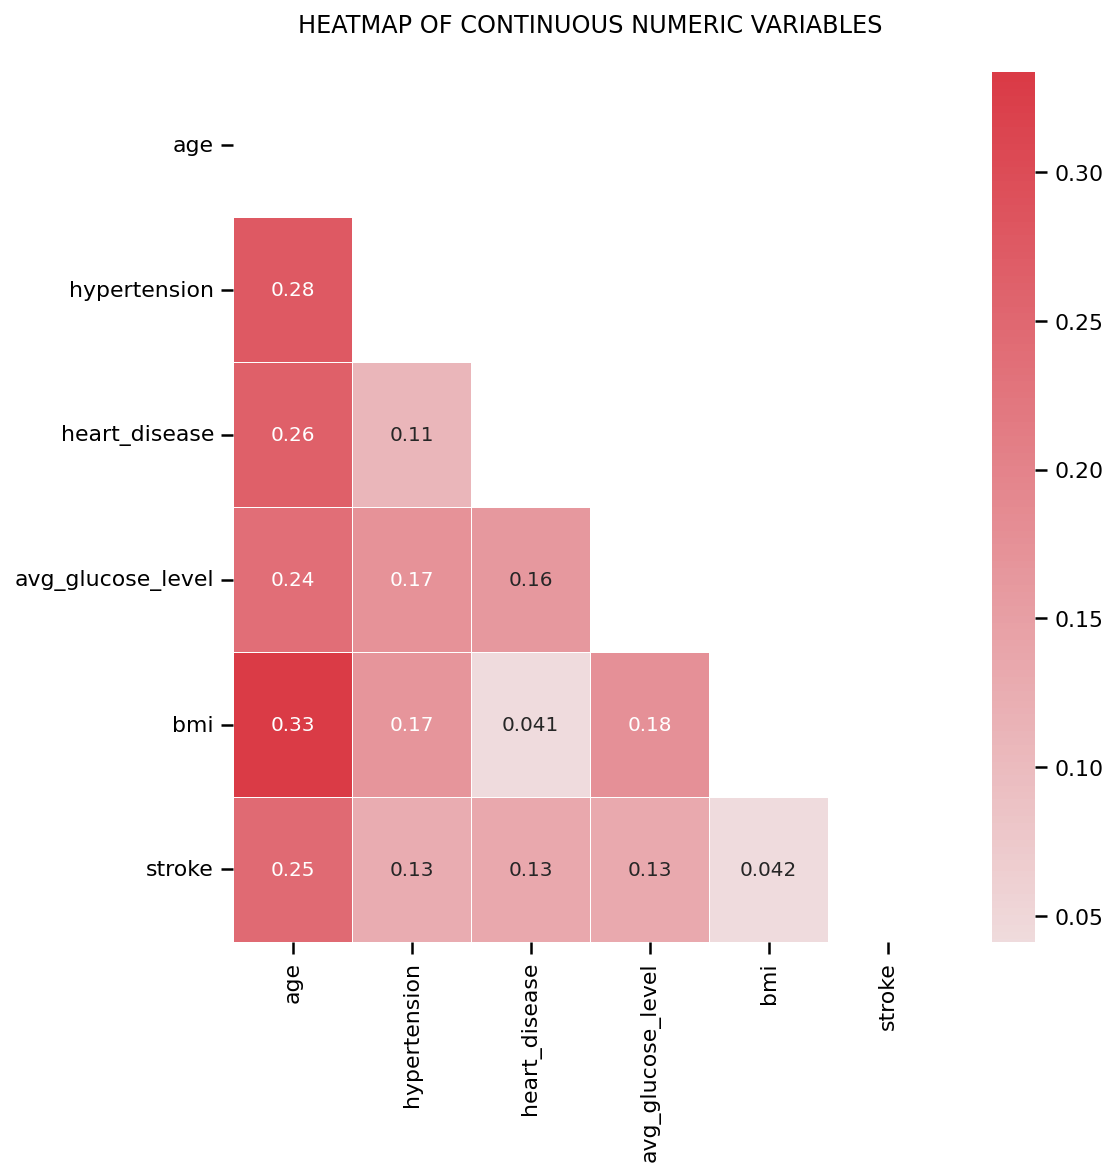

In [12]:
#HEATMAP OF NUMERIC VARIABLES:
corr = df.corr().abs()

#Create corresponding array of zeros output as a boolean dtype
mask = np.zeros_like(corr, dtype=bool)
mask

#Remove the upper R hand triangle
#note that np.tril_indices_from(mask) removes lower L triangle
mask[np.triu_indices_from(mask)] = True
mask

#Set the colour palette and the figsize
cmap = sns.diverging_palette(260, 10, as_cmap=True)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr, mask=mask, linewidths=.5,cmap=cmap, center=0, annot=True).set(title ='HEATMAP OF CONTINUOUS NUMERIC VARIABLES\n')
plt.show()

In [20]:
#Function to select min and max vals for each variable
def get_min_max(df_, col):
    min_max = df_.unstack()[col].sort_values()[[0,-2]]
    return print(f'The min and max values for {col} are:\n '
                 f'{min_max}')
get_min_max(corr, 'bmi')

The min and max values for bmi are:
 heart_disease   0.04
age             0.33
dtype: float64


##### OVERVIEW OF NUMERICAL VARIABLES CENTRAL TENDANCY AND SPREAD

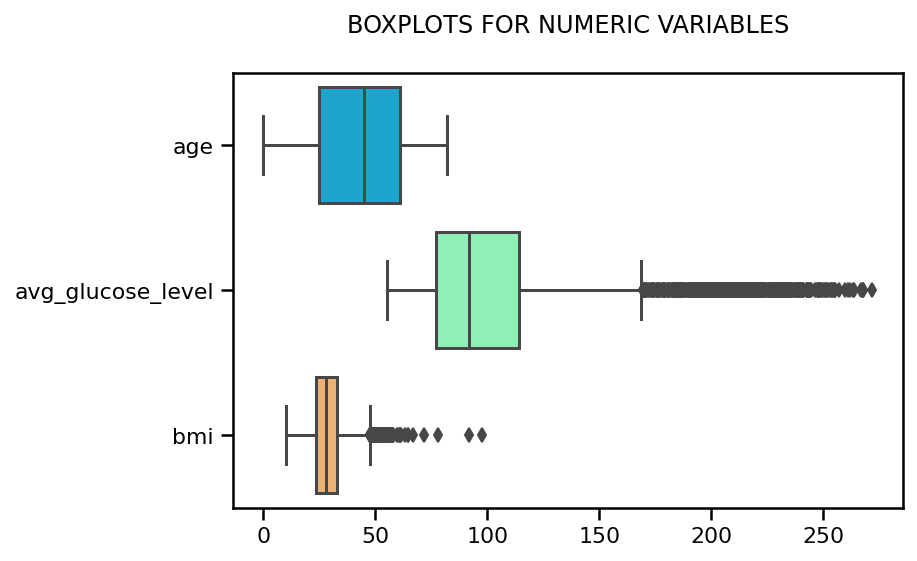

In [13]:
sns.boxplot(data=df[['age', 'avg_glucose_level', 'bmi']],palette='rainbow',orient='h')
plt.title('BOXPLOTS FOR NUMERIC VARIABLES\n')
plt.show()

### UNIVARIATE ANALYSIS:

- Visualise bar charts with categorical variables to check all categories are appropriate to be included in dataset
- Visualise dispersion and distribution for continuous numeric variables     with histograms and boxplots, with view to identifying outliers

### CATEGORICALS:

- Bar charts to view the ratio of the categoricals that are represented with Y/N or 1/0 answers

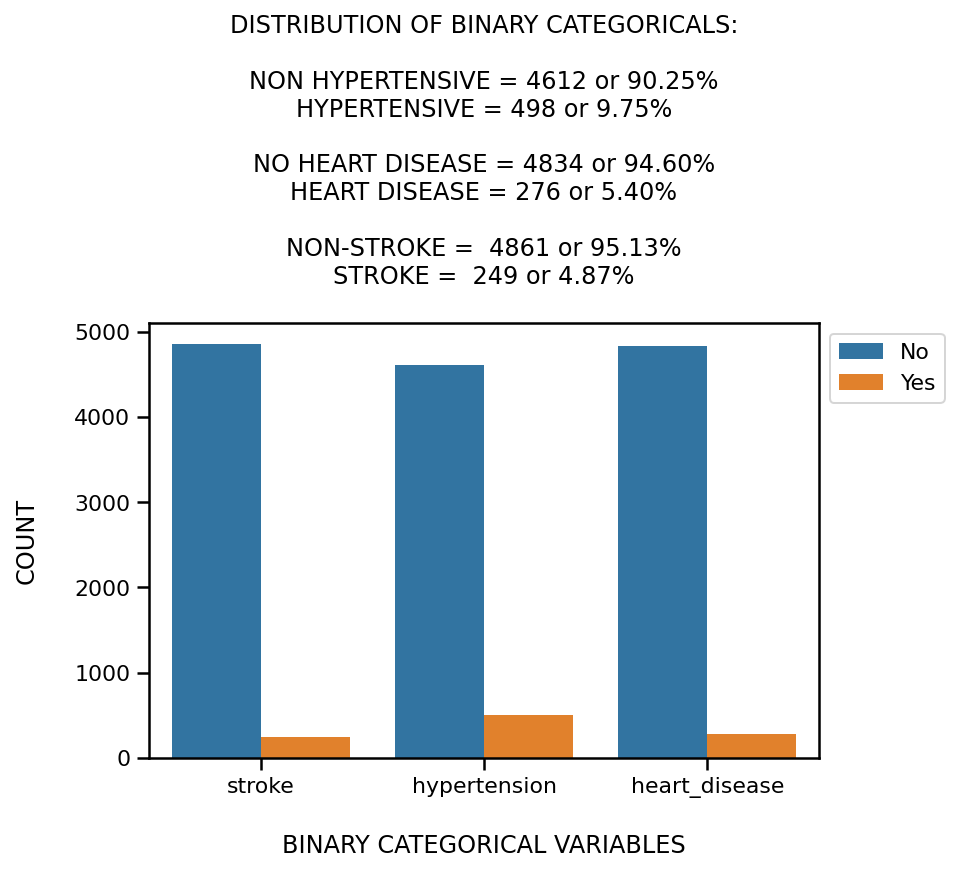

In [14]:
ax = sns.countplot(x="variable", hue="value", data=pd.melt(df[['stroke','hypertension','heart_disease']]))
legend_handles, _= ax.get_legend_handles_labels()
ax.legend(legend_handles, ['No', 'Yes'], bbox_to_anchor=(1,1))
plt.title('DISTRIBUTION OF BINARY CATEGORICALS:\n'
         f'\nNON HYPERTENSIVE = {df.hypertension.value_counts()[0]} or {(df.hypertension == 0).mul(100).mean():.2f}%' 
         f'\nHYPERTENSIVE = {df.hypertension.value_counts()[1]} or {(df.hypertension == 1).mul(100).mean():.2f}%'
         f'\n\nNO HEART DISEASE = {df.heart_disease.value_counts()[0]} or {(df.heart_disease == 0).mul(100).mean():.2f}%'
         f'\nHEART DISEASE = {df.heart_disease.value_counts()[1]} or {(df.heart_disease == 1).mul(100).mean():.2f}%\n '
         f'\nNON-STROKE =  {df.stroke.value_counts()[0]} or {(df.stroke == 0).mul(100).mean():.2f}%'
         f'\nSTROKE =  {df.stroke.value_counts()[1]} or {(df.stroke == 1).mul(100).mean():.2f}%\n')
plt.xlabel('\nBINARY CATEGORICAL VARIABLES')
plt.ylabel('COUNT\n')
plt.show()

In [15]:
print('WITHIN THIS DATASET:')
print(f'STROKE: {(df.stroke == 1).mul(100).mean():.2f}%')
print(f'FEMALES: {((df.gender == "Female") & (df.stroke == 1)).mul(100).mean():.2f}%')
print(f'MALES: {((df.gender == "Male") & (df.stroke == 1)).mul(100).mean():.2f}%')

WITHIN THIS DATASET:
STROKE: 4.87%
FEMALES: 2.76%
MALES: 2.11%


In [16]:
print('WITHIN THIS DATASET:')
print(f'HYPERTENSION: {(df.hypertension == 1).mul(100).mean():.2f}%')
print(f'FEMALES: {((df.gender == "Female") & (df.hypertension == 1)).mul(100).mean():.2f}%')
print(f'MALES: {((df.gender == "Male") & (df.hypertension == 1)).mul(100).mean():.2f}%')

WITHIN THIS DATASET:
HYPERTENSION: 9.75%
FEMALES: 5.40%
MALES: 4.34%


#### CURRENT STATISTICS ON HYPERTENSION IN UK:

https://www.gov.uk/government/publications/health-matters-combating-high-blood-pressure/health-matters-combating-high-blood-pressure#scale-of-the-problem

- 31% men, 26% women have diagnosed HTN (2015 figure)
- 4m people under the age of 65 (UK) living with untreated HTN
- 1.3m of those are under 45 (BHF statistics)

##### Limitations of data

- Small sample size with only 9.74% recording HTN as a problem
- This seems much lower than the national average in the UK

In [17]:
print('WITHIN THIS DATASET:')
print(f'HEART DISEASE: {(df.heart_disease == 1).mul(100).mean():.2f}%')
print(f'FEMALES: {((df.gender == "Female") & (df.heart_disease == 1)).mul(100).mean():.2f}%')
print(f'MALES: {((df.gender == "Male") & (df.heart_disease == 1)).mul(100).mean():.2f}%')

WITHIN THIS DATASET:
HEART DISEASE: 5.40%
FEMALES: 2.21%
MALES: 3.19%


#### HD: 

- Approx 14% of adults aged 16 and over, 15% of men and 13% of women, have a medical diagnosis of cardiovascular disease 

- Only 5.4% of the dataset have recorded HD as a problem

##### Limitations with data

- Small sample size with heart disease not representative of prevalence in population

#### Y/N CATEGORICALS AND THOSE WITH MULTIPLE SUB-CLASSIFICATIONS:

- Gender, ever married, work type, residence type

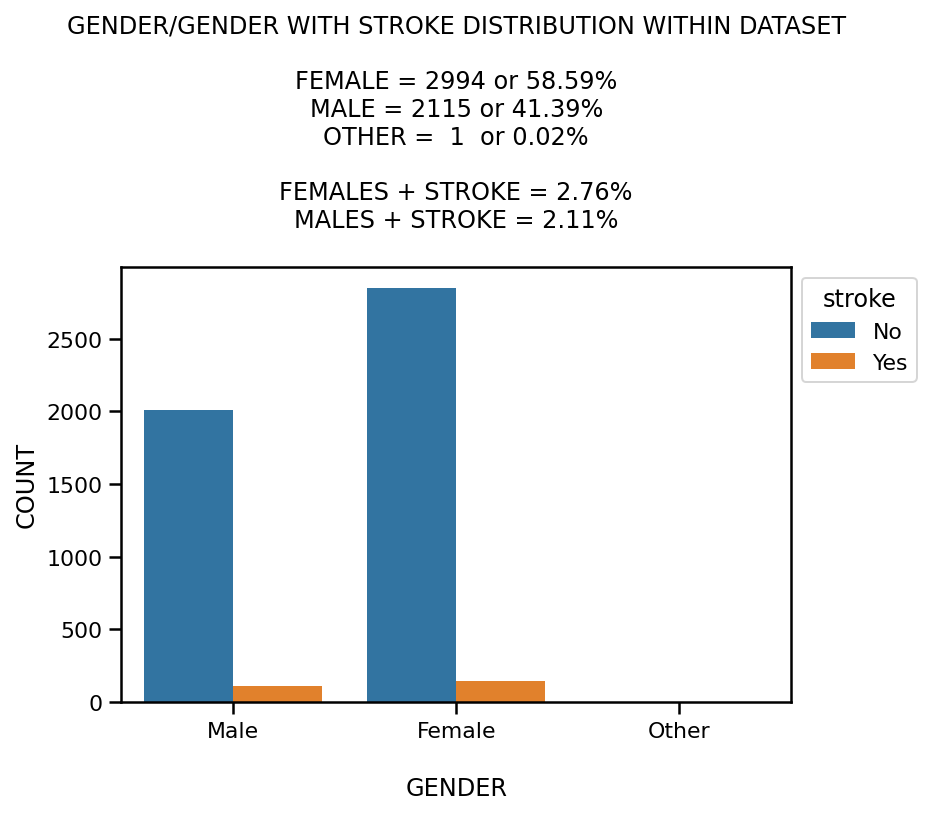

In [18]:
#BIOLOGICAL SEX OR GENDER?
ax = sns.countplot(x='gender',data=df, hue='stroke')
legend_handles, _= ax.get_legend_handles_labels()
ax.legend(legend_handles, ['No', 'Yes'], bbox_to_anchor=(1,1), title = 'stroke')
plt.xlabel('\nGENDER')
plt.ylabel('COUNT')
plt.title('GENDER WITH STROKE DISTRIBUTION WITHIN DATASET\n\n'
         f'FEMALE = {df.gender.value_counts()[0]} or {(df.gender == "Female").mul(100).mean():.2f}%'
         f'\nMALE = {df.gender.value_counts()[1]} or {(df.gender == "Male").mul(100).mean():.2f}%\n'
         f'OTHER =  {df.gender.value_counts()[2]}  or {(df.gender == "Other").mul(100).mean():.2f}%\n'
         f'\nFEMALES + STROKE = {((df.gender == "Female") & (df.stroke == 1)).mul(100).mean():.2f}%'
         f'\nMALES + STROKE = {((df.gender == "Male") & (df.stroke == 1)).mul(100).mean():.2f}%\n')
plt.show()

In [ ]:
#Locate gender = 'other' and remove this row 
#Rename gender to sex in tweak function 
np.where(df.gender == 'Other')

#### GENDER:

- 2011 census showed approx 51% female and 49% males within UK population 
- Roughly similar between different ethnic groups 

- Proportion of F/M in this dataset is comparable to national ratio

##### Limitations of data

- Rename as sex instead of gender, as only one entry that can be considered gender rather than bioligical sex
- Classify as category dtype

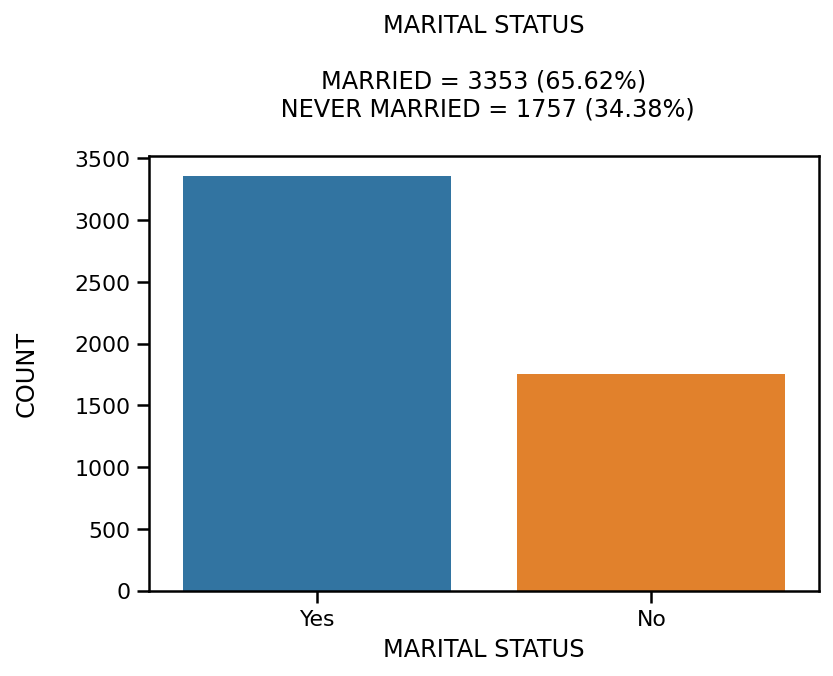

In [19]:
#MARITAL STATUS
sns.countplot(x='ever_married',data=df)
plt.xlabel('MARITAL STATUS')
plt.ylabel('COUNT\n')
plt.title('MARITAL STATUS\n\n'
         f'MARRIED = {df.ever_married.value_counts()[0]} '
         f'({(df.ever_married == "Yes").mul(100).mean():.2f}%)'
         f'\n NEVER MARRIED = {df.ever_married.value_counts()[1]} '
        f'({(df.ever_married== "No").mul(100).mean():.2f}%)\n')
plt.show()

#### MARITAL STATUS

- Not sure this is important as a predictor of stroke 
- Again, average household income may be more indicative of health outcomes
- Classify into category dtype

In [ ]:
#EMPLOYMENT STATUS
sns.countplot(x='work_type',data=df)
plt.xlabel('\nEMPLOYMENT STATUS')
plt.ylabel('COUNT')
plt.title('EMPLOYMENT STATUS:\n'
         f'\nChild = {df.work_type.value_counts()[2]} ' 
         f'({(df.work_type == "children").mul(100).mean():.2f}%)'
         f'\nGovernment Job = {df.work_type.value_counts()[3]} '
         f'({(df.work_type == "Govt_job").mul(100).mean():.2f}%)'
         f'\nNever Worked = {df.work_type.value_counts()[4]} '
         f'({(df.work_type == "Never_worked").mul(100).mean():.2f})%'
         f'\nPrivate = {df.work_type.value_counts()[0]} '
         f'({(df.work_type == "Private").mul(100).mean():.2f}%)'
         f'\nSelf Employed = {df.work_type.value_counts()[1]} '
         f'({(df.work_type == "Self-employed").mul(100).mean():.2f}%)\n')
plt.show()

#### EMPLOYMENT STATUS 

- Not sure these categories will be very important in the prediction 
- Probably more useful to split into employed/not employed 
- Average household income is probably more related to health outcomes

##### Limitations/issues with this column
- Under 16's have been recorded as never worked instead of children in certain places 
- This may skew the never worked values, unless split into employed/unemployed
- Split into employed (private, self-employed. govt job) and unemployed (never worked, children)
- Classify into category dtype

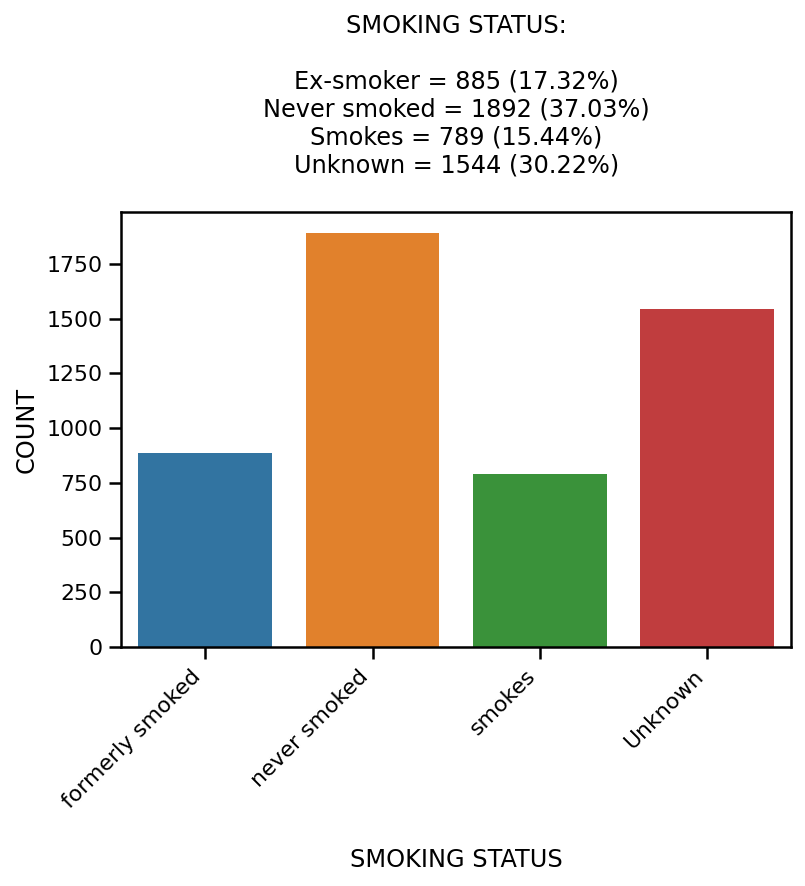

In [21]:
sns.countplot(x='smoking_status',data=df)
plt.xlabel('\nSMOKING STATUS')
plt.ylabel('COUNT')
plt.xticks(rotation = 45, ha = 'right')
plt.title('SMOKING STATUS:\n'
        f'\nEx-smoker = {df.smoking_status.value_counts()[2]} ' 
        f'({(df.smoking_status == "formerly smoked").mul(100).mean():.2f}%)'
        f'\nNever smoked = {df.smoking_status.value_counts()[0]} '
        f'({(df.smoking_status == "never smoked").mul(100).mean():.2f}%)'
        f'\nSmokes = {df.smoking_status.value_counts()[3]} '
        f'({(df.smoking_status == "smokes").mul(100).mean():.2f}%)'
        f'\nUnknown = {df.smoking_status.value_counts()[1]} '
        f'({(df.smoking_status == "Unknown").mul(100).mean():.2f}%)\n')
plt.show()

In [24]:
print(f'UNKNOWN SMOKING STATUS: {(df.smoking_status == "Unknown").mul(100).mean():.2f}%')
print(f'<=16 WHERE SMOKING STATUS IS UNKNOWN: {((df.smoking_status == "Unknown") & (df.age <=16)).mul(100).mean():.2F}%')
print(f'<=16 RECORDED AS SMOKER: {((df.smoking_status == "smokes") & (df.age <=16)).mul(100).mean():.1F}%')

UNKNOWN SMOKING STATUS: 30.22%
<=16 WHERE SMOKING STATUS IS UNKNOWN: 12.86%
<=16 RECORDED AS SMOKER: 0.1%


#### NOTES ON SMOKING DATA: 

- In UK 13.3% reported smoking cigarettes in 2021
- Dataset has slightly higher proprotion than this but  we do not know when data was collected

##### Limitations with data
- Unknown values for 1544 people (30.21% of dataset)
- Important as smoking is correlated with HTN, T2DM, HTN and stroke

##### How to clean this column
- Could replace any 'unknown' values with never smoked if <16
- Even if few < 16's smoke, it will not have been for long enough to be a factor in increased risk of stroke
- Classify as a category dtype

##### Other considerations
- Split the column into smokes = yes (smoker), no (all other values), to evaluate risk of current smoking status on risk of stroke
- To evaluate risk of being ex-smoker, we would need more info (eg when did they give up, how many cigarettes did they smoke and for how long)

### AGE AND AGE RANGE:
- Although age is a continuous variable, it will be discrete for this analysis as we are more interested in age range 

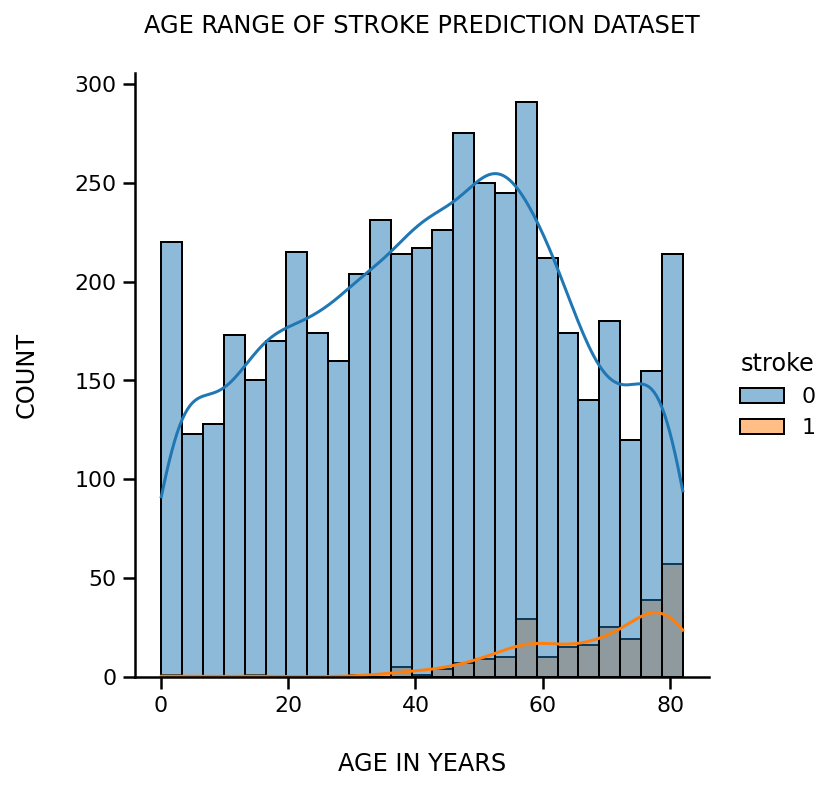

In [25]:
sns.displot(df, x='age',hue ='stroke', kde = True, bins=25)
plt.title('AGE RANGE OF STROKE PREDICTION DATASET\n')
plt.xlabel('\nAGE IN YEARS')
plt.ylabel('COUNT\n')
plt.show()

In [26]:
print('PERCENTAGE OF STROKES: ')
print(f'< 50 yrs:{(((df.stroke == 1) & (df.age <=50)).value_counts()[1]/(df.stroke == 1).value_counts()[1])*100:.2f}%')
print(f'> 50 yrs: {(((df.stroke == 1) & (df.age >50)).value_counts()[1]/(df.stroke == 1).value_counts()[1])*100:.2f}%')
print(f'> 60 yrs: {(((df.stroke == 1) & (df.age >=60)).value_counts()[1]/(df.stroke == 1).value_counts()[1])*100:.2f}%')
print(f'> 70 yrs: {(((df.stroke == 1) & (df.age >=70)).value_counts()[1]/(df.stroke == 1).value_counts()[1])*100:.2f}%')
print(f'> 80 yrs: {(((df.stroke == 1) & (df.age >=80)).value_counts()[1]/(df.stroke == 1).value_counts()[1])*100:.2f}%')

PERCENTAGE OF STROKES: 
< 50 yrs:9.24%
> 50 yrs: 90.76%
> 60 yrs: 72.69%
> 70 yrs: 53.82%
> 80 yrs: 16.06%


In [27]:
f'PERCENTAGE OF DATASET > 80 YEARS: {(df.age >=80).mul(100).mean():.2f}%'

'PERCENTAGE OF DATASET > 80 YEARS: 3.64%'

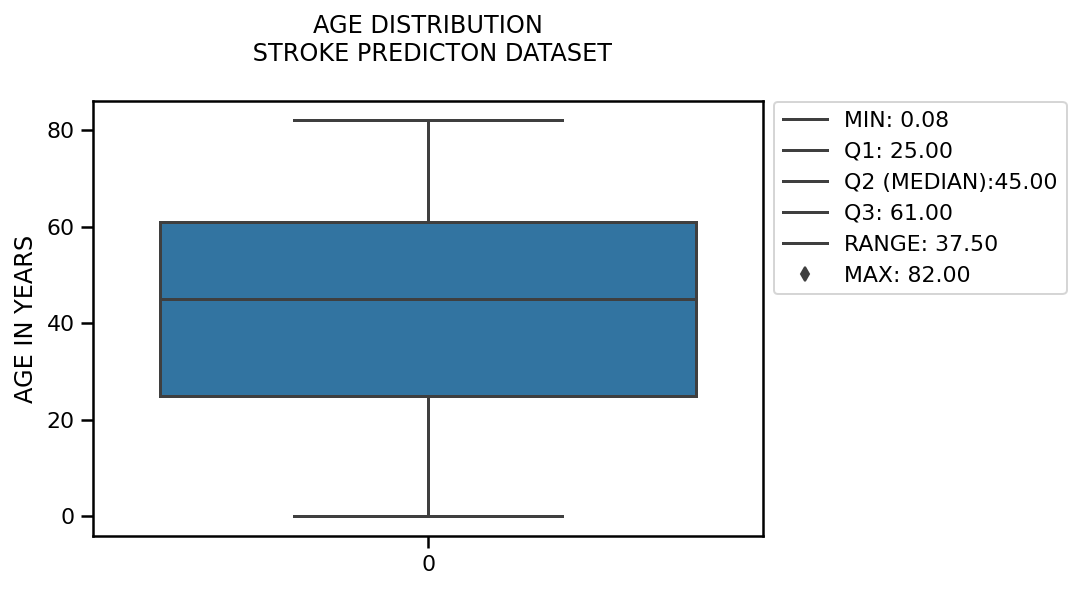

In [28]:
sns.boxplot(data=df.age)
plt.ylabel('AGE IN YEARS')
plt.title('AGE DISTRIBUTION\n STROKE PREDICTON DATASET\n')
plt.legend([f'MIN: {df.age.min():.2f}',
            f'Q1: {df.age.quantile(.25):.2f}',
            f'Q2 (MEDIAN):{df.age.median():.2f}',
            f'Q3: {df.age.quantile(.75):.2f}',
            f'RANGE: {df.age.quantile(.75) - df.bmi.quantile(.25):.2f}',
            f'MAX: {df.age.max():.2f}'],
            bbox_to_anchor=(1,.53), loc="lower left")
plt.show()

#### What is the prevalence of stroke and TIA in the UK? (Last revised in January 2022)

- Strokes are occurring at an earlier age 
- Age at onset fell from 70.5 to 68.2 years in males and 74.5 to 73.0 years in females between 2007 and 2016
- Over a third of strokes occurred in adults aged between 40 and 69 years
- Median age of stroke in males was 70 years/76 years in females 
- Largest number of strokes in males occurred in those aged 70–79 years and in those aged 80–89 years in females

##### Limitations of the dataset:

- Low age cut-off with 82 years being the max age 

##### How to clean this column 

- Store as int8 as no missing values and will transform to discrete variable, so easier to bin into age range
- Store age range as a category dtype

### BMI AND BMI RANGE:



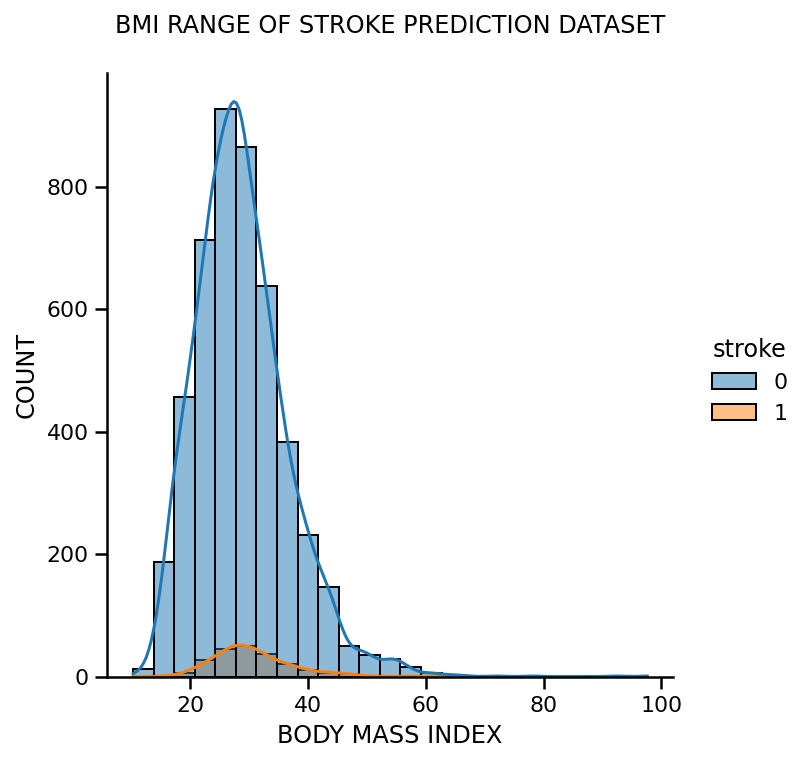

In [29]:
sns.displot(df, x= 'bmi', hue='stroke', kde = True, bins=25)
plt.title('BMI RANGE OF STROKE PREDICTION DATASET\n')
plt.xlabel('BODY MASS INDEX')
plt.ylabel('COUNT')
plt.show()

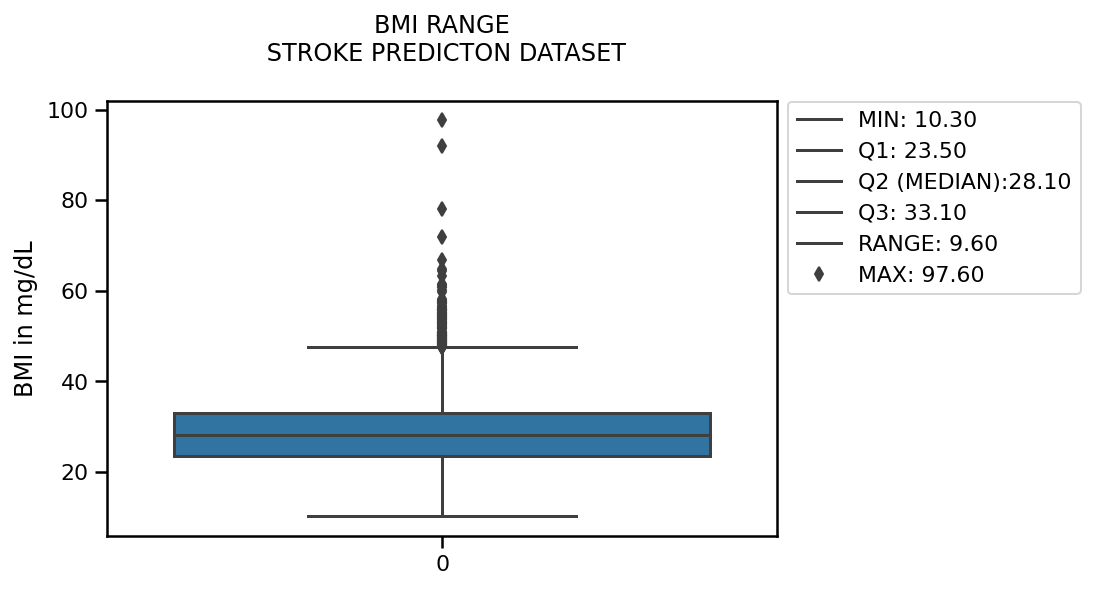

In [30]:
sns.boxplot(data = df.bmi)
plt.ylabel('BMI in mg/dL')
plt.title('BMI RANGE\n STROKE PREDICTON DATASET\n')
plt.legend([f'MIN: {df.bmi.min():.2f}',
            f'Q1: {df.bmi.quantile(.25):.2f}',
            f'Q2 (MEDIAN):{df.bmi.median():.2f}',
            f'Q3: {df.bmi.quantile(.75):.2f}',
            f'RANGE: {df.bmi.quantile(.75) - df.bmi.quantile(.25):.2f}',
            f'MAX: {df.bmi.max():.2f}'],
            bbox_to_anchor=(1,.53), loc="lower left")
plt.show()

In [31]:
#Investigate the high outliers on original DF
df[df.bmi>65]
np.where(df.bmi > 65)
#Remove the data points > 65 at those array positions
#As they are way too high for BMI readings 

(array([ 544,  928, 1559, 2128, 4209], dtype=int64),)

In [32]:
#201 missing values for BMI
print(f'PERCENTAGE MISSING VALUES FOR BMI: {df.bmi.isna().mul(100).mean():.2F}%')
print(f'OVERWEIGHT AND OBESE ADULTS: {((df.bmi > 30) & (df.age >=19)).mul(100).mean():.2f}%\n' 
f'OVERWEIGHT AND OBESE TEENS,CHILDREN AND INFANTS: {((df.bmi > 30) & (df.age <=19)).mul(100).mean():.2f}%') 

PERCENTAGE MISSING VALUES FOR BMI: 3.93%
OVERWEIGHT AND OBESE ADULTS: 35.42%
OVERWEIGHT AND OBESE TEENS,CHILDREN AND INFANTS: 1.82%


#### BMI RANGES WITHIN THE UK:

- 26% of adults in England are obese and further 38% are overweight 
  (12/01/23, House of Commons Research Library)

##### Limitations/issues with dataset
- Some very high outliers that I think may have been errors i.e. recorded weight instead of BMI. This could account for the high outliers and the relatively large number of underweight infants and children

##### How to clean this column 
- Make age into age range column
- Fill missing values with the median for each age range, as the mean is skewed by the high outliers, plus BMI rises with age
- Classify BMI range as a category dtype

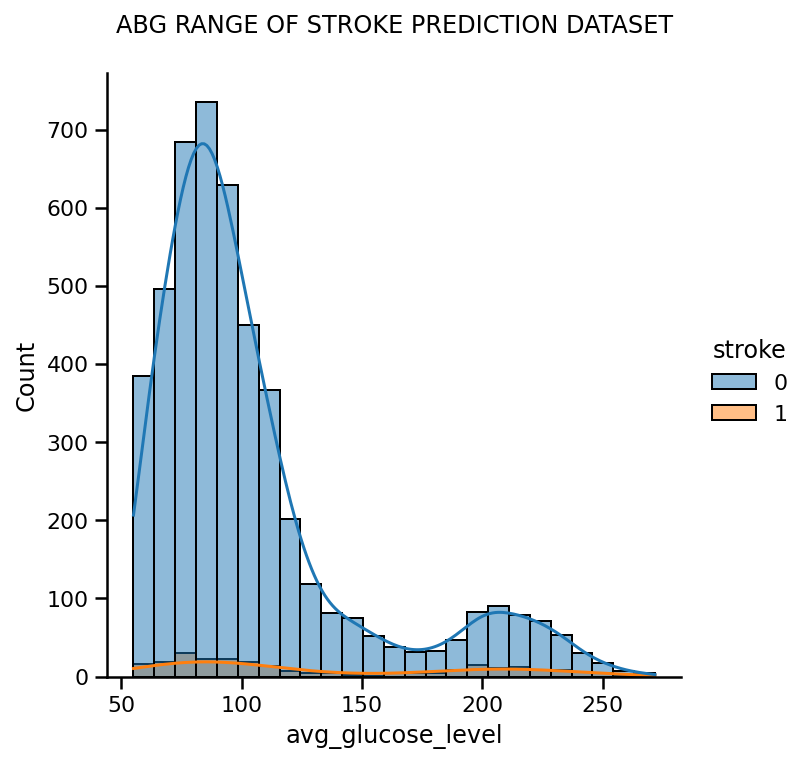

In [33]:
sns.displot(df, x = 'avg_glucose_level', kde = True, bins=25, hue='stroke')
plt.title('ABG RANGE OF STROKE PREDICTION DATASET\n')
plt.show()

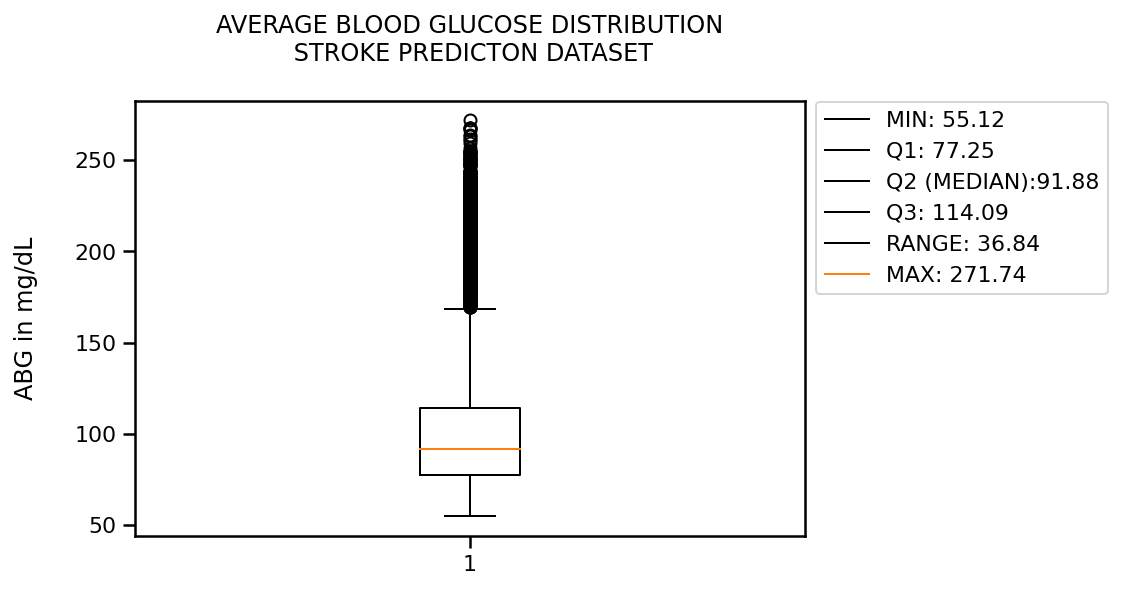

In [34]:
plt.boxplot(df.avg_glucose_level)
plt.ylabel('ABG in mg/dL\n')
plt.title('AVERAGE BLOOD GLUCOSE DISTRIBUTION\n STROKE PREDICTON DATASET\n')
plt.legend([f'MIN: {df.avg_glucose_level.min():.2f}',
            f'Q1: {df.avg_glucose_level.quantile(.25):.2f}',
            f'Q2 (MEDIAN):{df.avg_glucose_level.median():.2f}',
            f'Q3: {df.avg_glucose_level.quantile(.75):.2f}',
            f'RANGE: {df.avg_glucose_level.quantile(.75) - df.avg_glucose_level.quantile(.25):.2f}',
            f'MAX: {df.avg_glucose_level.max():.2f}'],
            bbox_to_anchor=(1,.53), loc="lower left")
plt.show()

In [35]:
"""
Initial data cleaning function:
- clean up the columns
- lowercase all strings, remove whitespace and replace any '-' with '_'
- assign an age range column 
- drop outliers and reorder by ascending age

"""

def tweak_data(df_):
    return (df_
            #lowercase all cols to make vlid python variables
            .rename(columns = lambda col:col.lower())
            #ok to use on strings as not vectorised
            .apply(lambda val: val.str.lower() if(val.dtype == 'object') else val)
            #replace all spaces and dashes in DF with underscores
            #must use regex=True to find - between words
            .replace({' ':'_','-':'_'}, regex=True)
            #assign new columns for age range (change to categories)
            .assign(age_range = pd.Series(np.select([df_.age<=2,
                                                     (df_.age>2)&(df_.age<=9),
                                                     (df_.age>9)&(df_.age<=18), 
                                                     (df_.age>18)&(df_.age<=24),
                                                     (df_.age>24)&(df_.age<=59),
                                                      df_.age >59],
                                    ['infant','child','teenager','young_adult','adult','older_adult'])))       
            #drop gender = 'other' as is outlier
            .drop([544,  928, 1559, 2128,3116,4209], axis=0)
            #.drop('id', axis=1)
            #sort by age values 
            .sort_values('age')
            #reset index vals from 0-5109 (ascending age)
            .reset_index(drop=True) 
        )
                     
#assign df to new values
df_tweak = tweak_data(df)
df_tweak.head()

gender  age  hypertension  heart_disease ever_married work_type  \
0  female 0.08             0              0           no  children   
1    male 0.08             0              0           no  children   
2    male 0.16             0              0           no  children   
3    male 0.16             0              0           no  children   
4    male 0.16             0              0           no  children   

  residence_type  avg_glucose_level   bmi smoking_status  stroke age_range  
0          urban             139.67 14.10        unknown       0    infant  
1          rural              70.33 16.90        unknown       0    infant  
2          rural              69.79 13.00        unknown       0    infant  
3          urban             109.52 13.90        unknown       0    infant  
4          urban             114.71 17.40        unknown       0    infant

In [36]:
"""
Update values function to:
alter some values based on conditions within another column
fill the missing BMI values with the median value from each age range

"""
def update_vals(df_):
    return (df_
            #update work_type to 'children' instead of never_worked for <16
            .assign(work_type = np.where(df_[['age']] < 16, 'children', df_[['work_type']]),
                    #update smoking status to never_smoked if <10 and listed as unknown
                    smoking_status = np.where(df_[['age']] < 10, 'never_smoked', df_[['smoking_status']]),
                    #Fill the BMI missing values with the median for each age range
                    bmi = pd.Series(np.select([(df_.age_range == 'infant'),
                                        (df_.age_range == 'child'),
                                        (df_.age_range == 'teenager'), 
                                        (df_.age_range == 'young_adult'),
                                        (df_.age_range == 'adult'),
                                        (df_.age_range == 'older_adult')], 
                                       [df_.bmi.fillna(df_.loc[:174, 'bmi'].median()),
                                        df_.bmi.fillna(df_.loc[175:471, 'bmi'].median()),
                                        df_.bmi.fillna(df_.loc[472:914, 'bmi'].median()),
                                        df_.bmi.fillna(df_.loc[915:1233, 'bmi'].median()), 
                                        df_.bmi.fillna(df_.loc[1234:3728, 'bmi'].median()), 
                                        df_.bmi.fillna(df_.loc[3729:5104, 'bmi'].median())])))         
           )
df_copy = update_vals(df_tweak)


In [37]:
df_copy.bmi.isna().mul(100).mean()

0.0

In [38]:
"""
Function to review all columns:
rename gender column to sex
drop work_type and smoking status in favour of streamlined categoricals
"""
def review_cols(df_):
    return(df_
           .rename(columns = {'gender':'sex'})
           #able to place this here as working on intermediate df object
           #which has not yet been returned by the function 
           .drop(['work_type','smoking_status'], axis=1)
           #assign new range columns for easier data viz and for ML prep
           .assign(
                   diabetic_range = pd.Series(np.select([(df_.avg_glucose_level<=199), 
                                                     (df_.avg_glucose_level>199)], 
                                    ['no','yes'])),
                   bmi_range = pd.Series(np.select([(df_.bmi<=18.5),
                                     (df_.bmi>18.5)&(df_.bmi<=25), 
                                     (df_.bmi>25) &(df_.bmi<=30),
                                     (df_.bmi>30)], 
                                     ['underweight','normal',
                                      'overweight', 'obese'])),
                   employed = df_.work_type.replace({'children':'no', 'never_worked':'no', 
                                                               'private':'yes', 'self_employed':'yes', 
                                                               'govt_job':'yes'}),
                   current_smoker = df_.smoking_status.replace({'never_smoked':'no', 'unknown':'no', 
                                                                 'formerly_smoked':'no', 'smokes':'yes'}),
                   ex_smoker = df_.smoking_status.replace({'smokes':'no','never_smoked':'no', 'unknown':'no',
                                                            'formerly_smoked':'yes'}))
            
           #reclassify all of the columns to the correct dtype
           #to aid with saving memory 
            .astype({'bmi':'float32', 'avg_glucose_level':'float32','age' :'int8',
             'hypertension':'category','heart_disease':'category', 'stroke':'category',
            'age_range':'category', 'diabetic_range':'category','bmi_range':'category',
            'sex':'category', 'ever_married':'category',
            'residence_type':'category', 'employed':'category',
             'current_smoker':'category', 'ex_smoker':'category'})

          )
df_copy= review_cols(df_copy)

In [39]:
df_copy.info()
#pre-clean memory usage: 479.2+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5104 entries, 0 to 5103
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sex                5104 non-null   category
 1   age                5104 non-null   int8    
 2   hypertension       5104 non-null   category
 3   heart_disease      5104 non-null   category
 4   ever_married       5104 non-null   category
 5   residence_type     5104 non-null   category
 6   avg_glucose_level  5104 non-null   float32 
 7   bmi                5104 non-null   float32 
 8   stroke             5104 non-null   category
 9   age_range          5104 non-null   category
 10  diabetic_range     5104 non-null   category
 11  bmi_range          5104 non-null   category
 12  employed           5104 non-null   category
 13  current_smoker     5104 non-null   category
 14  ex_smoker          5104 non-null   category
dtypes: category(12), float32(2), int8(1)
memory usage: 106.

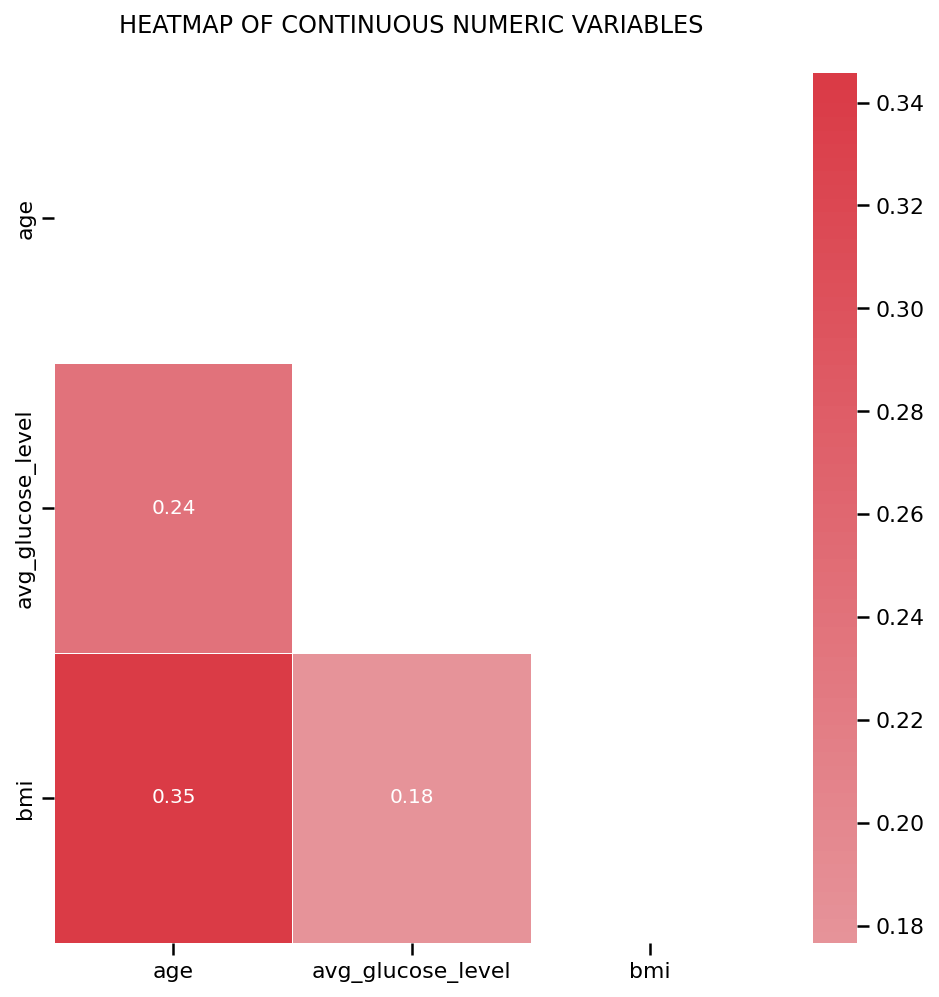

In [46]:
#CORRELATIONS BETWEEN NUMERICAL VARIABLES AFTER BMI MV FILLED
corr = df_copy.corr().abs()

mask = np.zeros_like(corr, dtype=bool)
mask
mask[np.triu_indices_from(mask)] = True
mask

cmap = sns.diverging_palette(260, 10, as_cmap=True)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr, mask=mask, linewidths=.5, cmap=cmap, center=0, annot=True).set(title ='HEATMAP OF CONTINUOUS NUMERIC VARIABLES\n')
plt.show()

In [47]:
print(f"Min/Max correlates for age:\n {corr2.unstack()['age'].sort_values()[[0,-2]]}")
print(f"\nMin/Max correlates for ABG:\n{corr2.unstack()['avg_glucose_level'].sort_values()[[0,-2]]}")
print(f"\nMin/Max correlates for BMI:\n{corr2.unstack()['bmi'].sort_values()[[0,-2]]}")

Min/Max correlates for age:
 avg_glucose_level   0.24
bmi                 0.35
dtype: float64

Min/Max correlates for ABG:
bmi   0.18
age   0.24
dtype: float64

Min/Max correlates for BMI:
avg_glucose_level   0.18
age                 0.35
dtype: float64


In [48]:
#Function to return the min and max values for each numeric variable
def min_max_vals(df, col):
    min_max = corr.unstack()[col].sort_values()[[0,-2]]
    return min_max
min_max_vals(corr, 'age')

avg_glucose_level   0.24
bmi                 0.35
dtype: float64

##### NOTE ON HEATMAP:

- Slight increase (0.33 to 0.35) between age and BMI after filling of missing values 

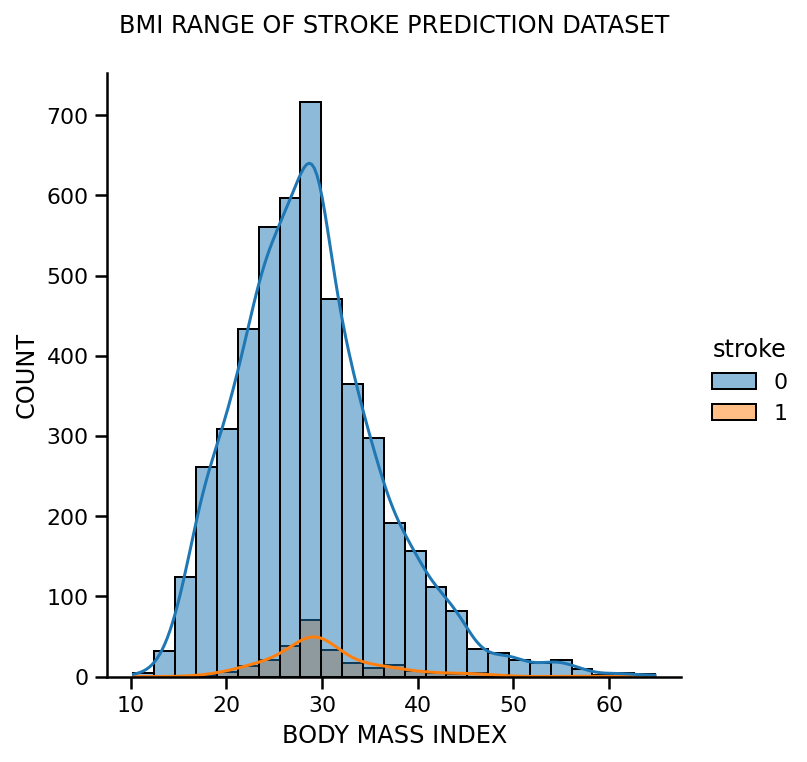

In [49]:
#OUTLIERS REMOVED
sns.displot(df_copy, x= 'bmi', kde = True, bins=25, hue='stroke')
plt.xlabel('BODY MASS INDEX')
plt.ylabel('COUNT')
plt.title('BMI RANGE OF STROKE PREDICTION DATASET\n')
plt.show()

- Can see that the peak distribution of strokes is within the > 30 BMI
- However frequency of stroke reduces from the mid-30's

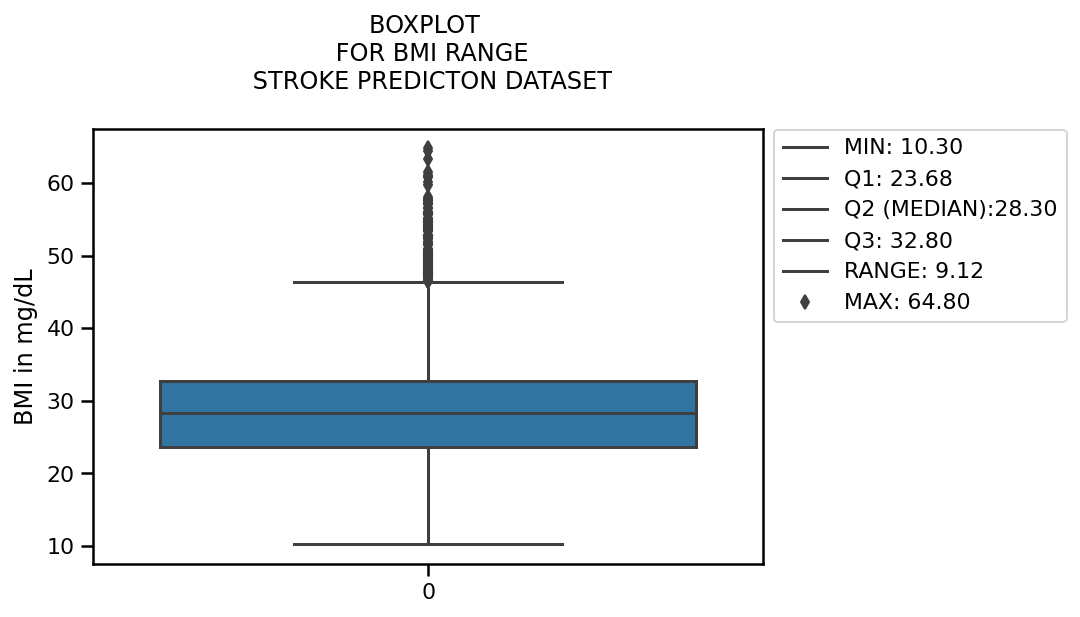

In [50]:
#Now we can view distribution with the high outliers removed
sns.boxplot(data = df_copy.bmi)
plt.ylabel('BMI in mg/dL')
plt.title('BOXPLOT \n FOR BMI RANGE\n STROKE PREDICTON DATASET\n')
plt.legend([f'MIN: {df_copy.bmi.min():.2f}',
            f'Q1: {df_copy.bmi.quantile(.25):.2f}',
            f'Q2 (MEDIAN):{df_copy.bmi.median():.2f}',
            f'Q3: {df_copy.bmi.quantile(.75):.2f}',
            f'RANGE: {df_copy.bmi.quantile(.75) - df_copy.bmi.quantile(.25):.2f}',
            f'MAX: {df_copy.bmi.max():.2f}'],
            bbox_to_anchor=(1,.53), loc="lower left")
plt.show()


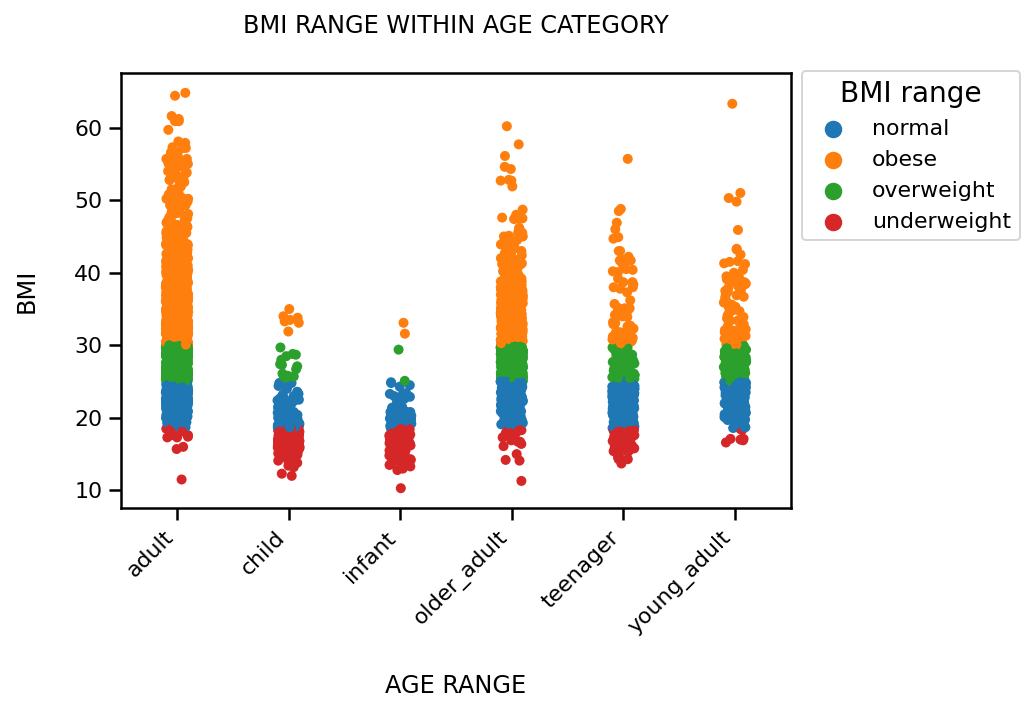

In [51]:
(sns.stripplot(data = df_copy, x='age_range', hue='bmi_range', y='bmi')
    .legend(title = "BMI range", 
            title_fontsize = 14, bbox_to_anchor=(1,.59), loc="lower left"))
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel('\nAGE RANGE')
plt.ylabel('BMI\n')
plt.title('BMI RANGE WITHIN AGE CATEGORY\n')
plt.show()

### AVERAGE BLOOD GLUCOSE AND DIABETIC RANGE:


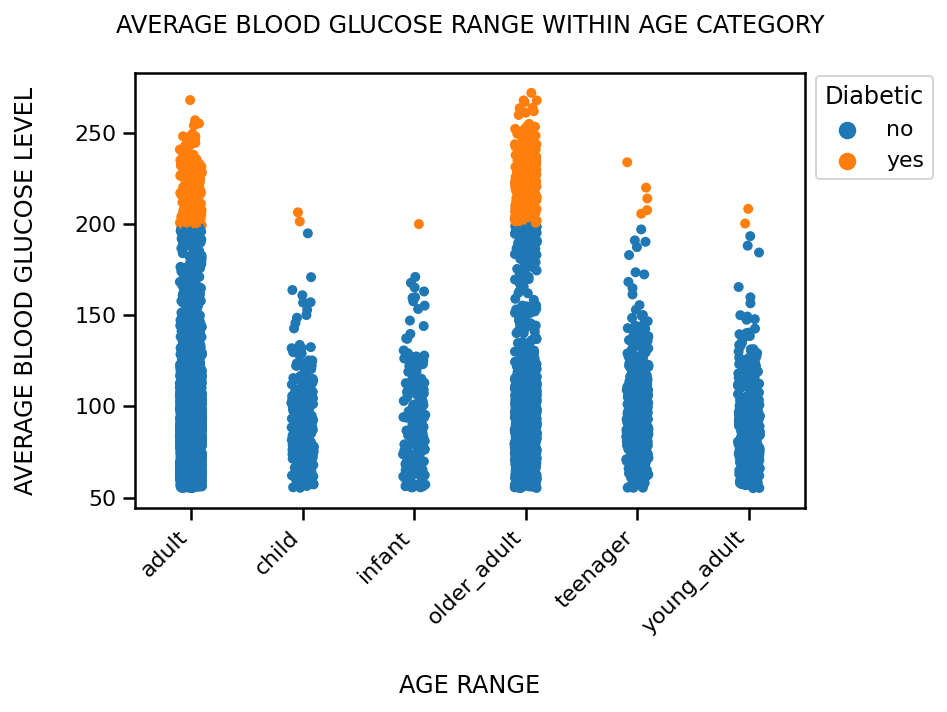

In [58]:
(sns.stripplot(data = df_copy, x='age_range', hue='diabetic_range', y='avg_glucose_level')
 .legend(bbox_to_anchor=(1,.73), loc="lower left", title = 'Diabetic'))
plt.title('AVERAGE BLOOD GLUCOSE RANGE WITHIN AGE CATEGORY\n')
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel('\nAGE RANGE')
plt.ylabel('AVERAGE BLOOD GLUCOSE LEVEL\n')
plt.show()

##### ANALYSIS OF DISTRIBUTION FOR BMI AND DIABTIC RANGE:

- Analysis shows that being overweight or obese increases with age
- Most of the individuals in those catgories are adults or older adults
- There are a lot of high and low outliers remaining, possibly as the value has been misrecorded as weight in kilos

- Higher incidence of pre-diabetes and diabetes in adults and older adults
- These populations are also overweight or obese, which can affect blood glucose and risk of diabetes
- Demonstrates that Type 2 diabetes is predominantly a lifestyle disease
- Younger people with diabetes are likely to be Type 1

#### PREVALENCE OF STROKE AND TIA IN THE UK? (Last revised in January     2022)  

- Strokes are occurring at an earlier age
- Age at onset fell from 70.5 to 68.2 years in males and 74.5 to 73.0         years in females between 2007 and 2016
- Over a third of strokes occurred in adults aged between 40 and 69           years
- Median age of stroke in males was 70 years/76 years in females
- Largest number of strokes in males occurred in those aged 70–79 years       and in those aged 80–89 years in females

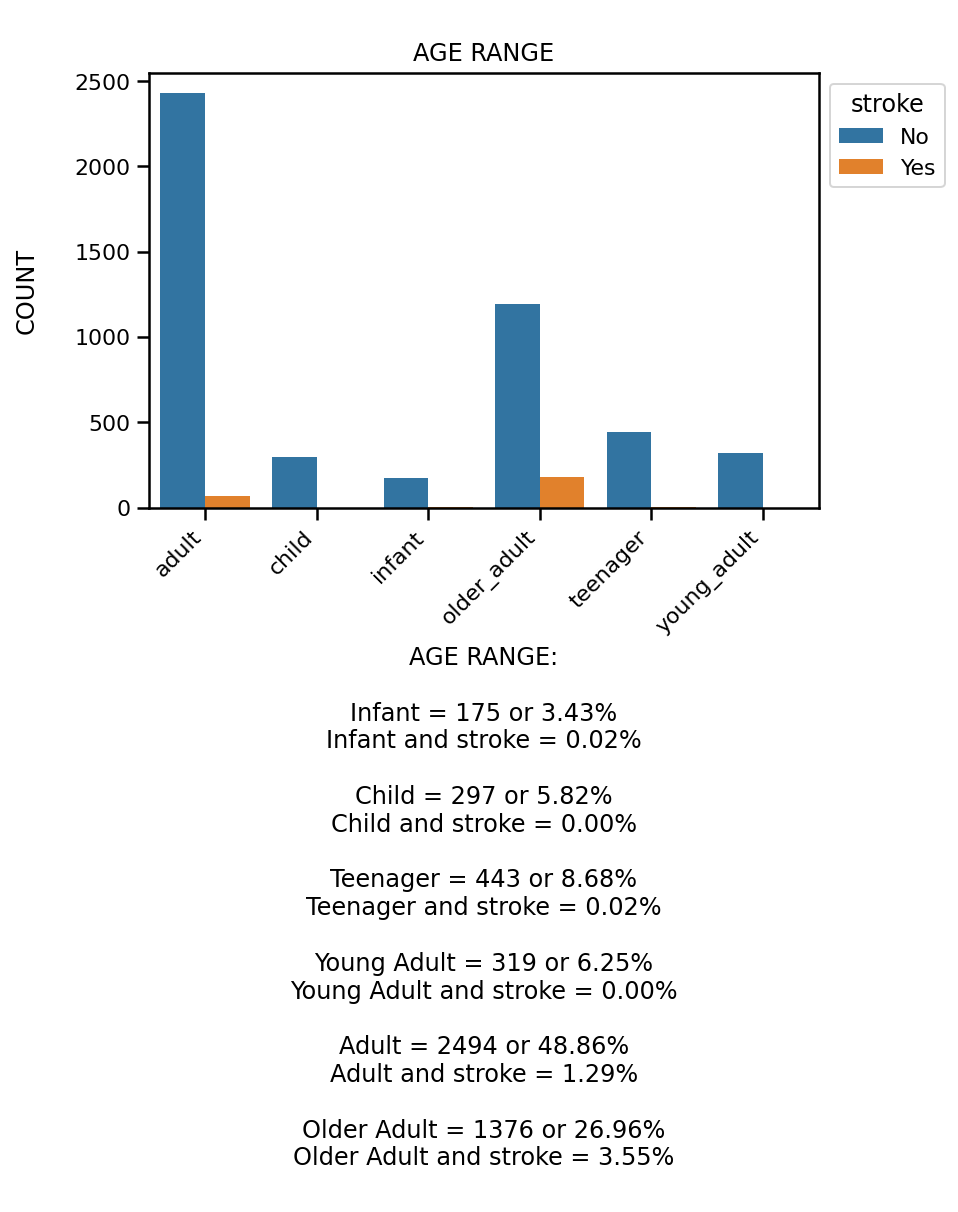

In [60]:
#Countplot of age range and stroke
ax = sns.countplot(data=df_copy, x='age_range', hue='stroke')
legend_handles, _= ax.get_legend_handles_labels()
ax.legend(legend_handles, ['No', 'Yes'], bbox_to_anchor=(1,1), title = 'stroke')
plt.title('\nAGE RANGE')
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel('COUNT\n')
plt.xlabel('AGE RANGE:\n'
         f'\nInfant = {df_copy.age_range.value_counts()[5]} or {(df_copy.age_range == "infant").mul(100).mean():.2f}%'
         f'\nInfant and stroke = {((df_copy.age_range == "infant") & (df_copy.stroke == 1)).mul(100).mean():.2f}%'
         
         f'\n\nChild = {df_copy.age_range.value_counts()[4]} or {(df_copy.age_range == "child").mul(100).mean():.2f}%'
         f'\nChild and stroke = {((df_copy.age_range == "child") & (df_copy.stroke == 1)).mul(100).mean():.2f}%'
         
         f'\n\nTeenager = {df_copy.age_range.value_counts()[2]} or {(df_copy.age_range == "teenager").mul(100).mean():.2f}%'
         f'\nTeenager and stroke = {((df_copy.age_range == "teenager") & (df_copy.stroke == 1)).mul(100).mean():.2f}%'
        
         f'\n\nYoung Adult = {df_copy.age_range.value_counts()[3]} or {(df_copy.age_range == "young_adult").mul(100).mean():.2f}%'
         f'\nYoung Adult and stroke = {((df_copy.age_range == "young_adult") & (df_copy.stroke == 1)).mul(100).mean():.2f}%'
         
         f'\n\nAdult = {df_copy.age_range.value_counts()[0]} or {(df_copy.age_range == "adult").mul(100).mean():.2f}%\n'
         f'Adult and stroke = {((df_copy.age_range == "adult") & (df_copy.stroke == 1)).mul(100).mean():.2f}%'
         
         f'\n\nOlder Adult = {df_copy.age_range.value_counts()[1]} or {(df_copy.age_range == "older_adult").mul(100).mean():.2f}%\n'
         f'Older Adult and stroke = {((df_copy.age_range == "older_adult") & (df_copy.stroke == 1)).mul(100).mean():.2f}%\n')
plt.show()

In [64]:
print(f'STROKES IN DATA SET: {(df_copy.stroke == 1).mul(100).mean():.2f}%')
print(f'FEMALES: {((df_copy.stroke == 1)&(df_copy.sex== "female")).mul(100).mean():.2f}%')
print(f'MALES: {((df_copy.stroke == 1)&(df_copy.sex=="male")).mul(100).mean():.2f}%')

STROKES IN DATA SET: 4.88%
FEMALES: 2.76%
MALES: 2.12%


In [66]:
print(f'> 50 AND STROKE: {((df_copy.stroke == 1)&(df_copy.age > 50)).mul(100).mean():.2f}%')
print(f'FEMALES: {((df_copy.stroke == 1)&(df_copy.sex== "female") & (df_copy.age >50)).mul(100).mean():.2f}%')
print(f'MALES: {((df_copy.stroke == 1)&(df_copy.sex=="male") & (df_copy.age > 50)).mul(100).mean():.2f}%')

> 50 AND STROKE: 4.43%
FEMALES: 2.43%
MALES: 2.00%


##### ANALYSIS OF AGE AND STROKE PREVALENCE:

- 4.84% of the 4.88% of strokes occurred in adults (1.29%) or older adults (3.55%) and only 0.04% of strokes occurred in the rest of the age ranges
- 4.43% of the the 4.88% of strokes occurred in adults > 50 years
- There is a relatively even spread of stroke between males (2.76%) and females (2.12%), however this may not be representative of general prevelance due to the cutoff age of 82 yrs
- This supports the hypothesis that stroke prevalence increases with age

### BIVARIATE ANALYSIS:

- Use relplot() to view the distribution of the numeric variables (age, BMI and average blood glucose
- Divide the data set between males and females, strokes and non stroke, to see if we can asceratin any patterns
- As BMI is higher in adults and older adults, and most of the strokes occurred in these age ranges, we explore this relationship further

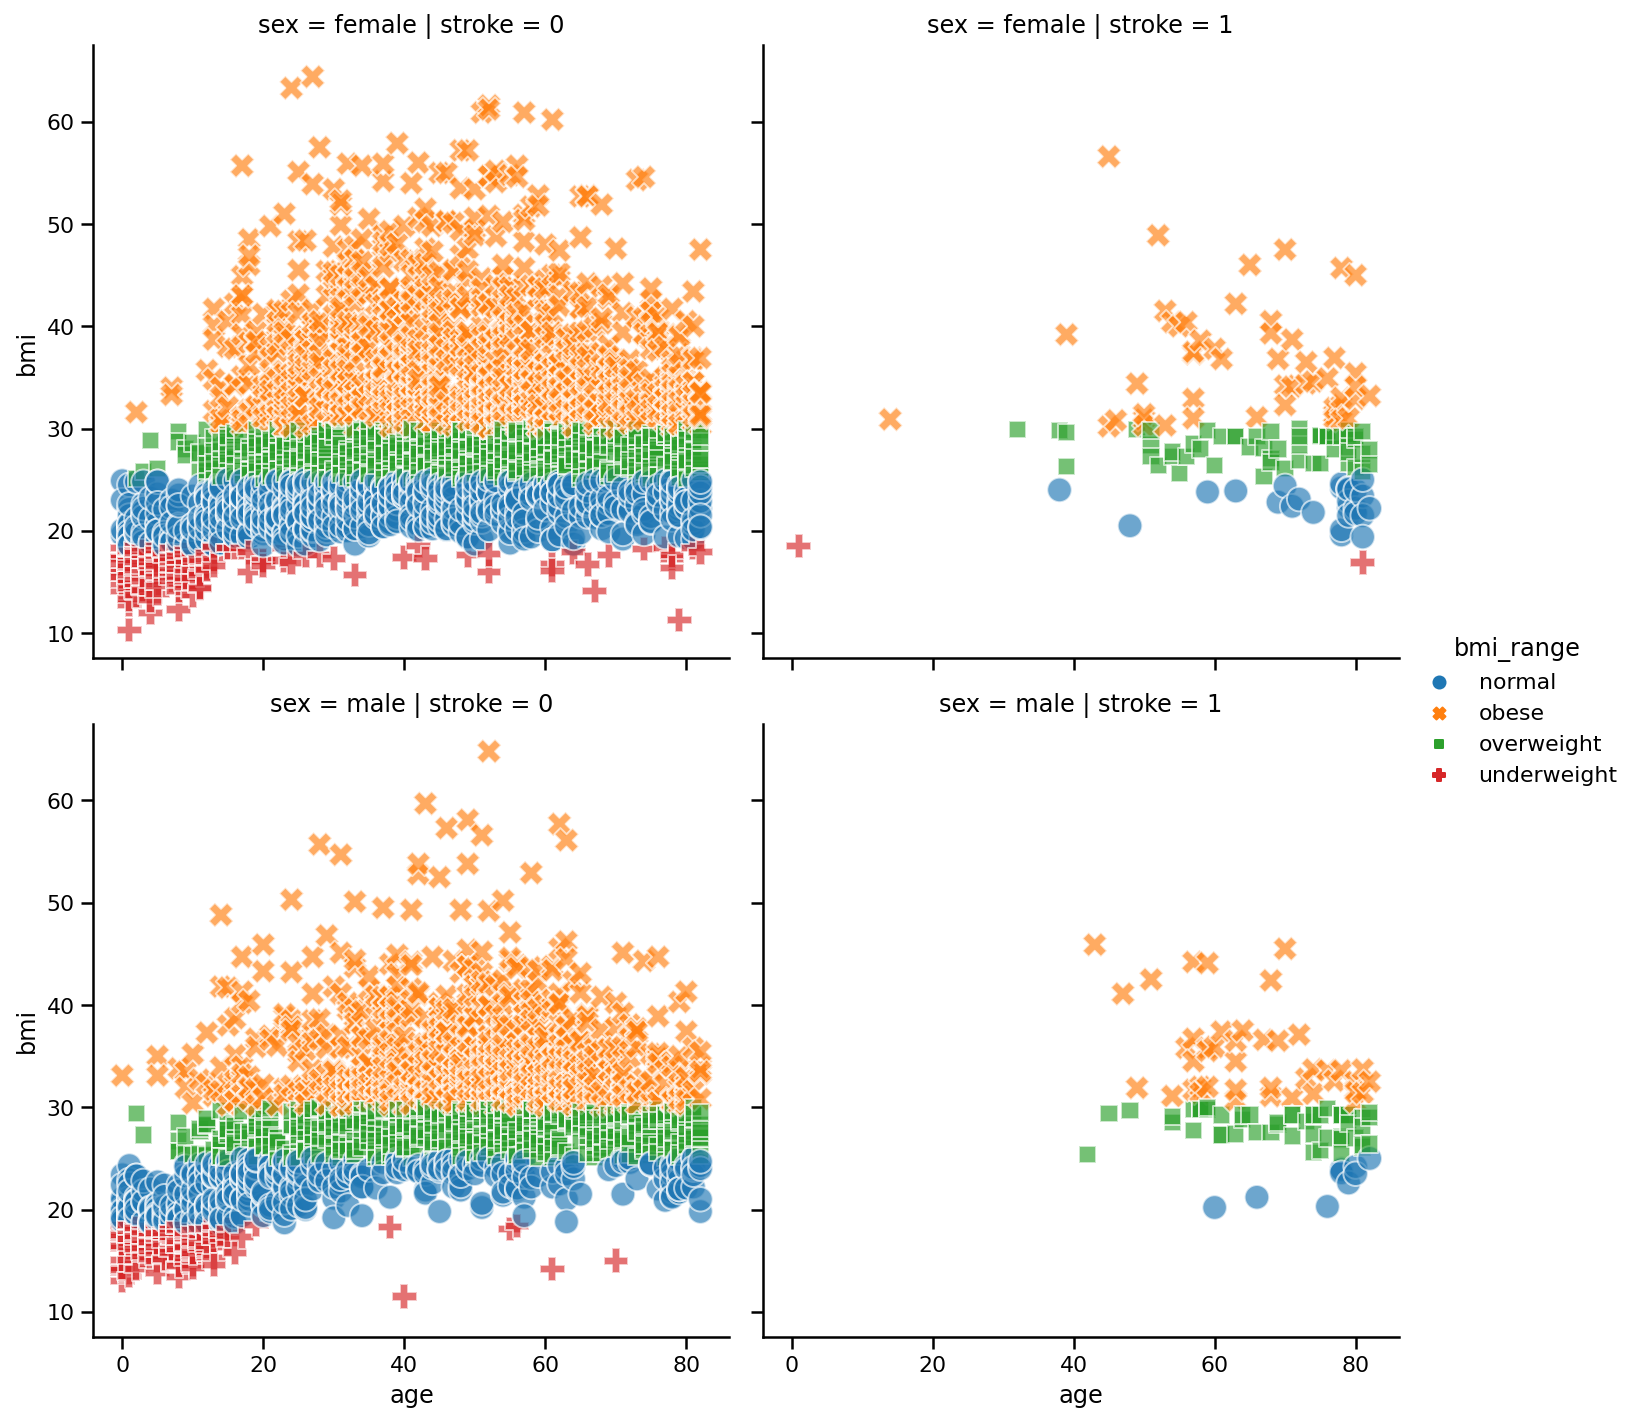

In [67]:
#Distribution of BMI range across age range for females and males 
#within the stroke and non stroke samples 
sns.relplot(
    data=df_copy,
    x='age', y="bmi", hue="bmi_range", style="bmi_range", 
    row = "sex", col="stroke", s=150,
    alpha = 0.65)
plt.show()

In [68]:
print(f'PERCENTAGE BMI > 30: {(df_copy.bmi > 30).mul(100).mean():.2f}%')
print(f'STROKE AND BMI > 30: {((df_copy.stroke == 1)&(df_copy.bmi > 30)).mul(100).mean():.2f}%')
print(f'NO STROKE AND BMI > 30: {((df_copy.stroke == 0)&(df_copy.bmi > 30 )).mul(100).mean():.2f}%')
print(f'STROKE AND BMI < 30: {((df_copy.stroke == 1)&(df_copy.bmi <30)).mul(100).mean():.2f}%')
print(f'NO STROKE AND BMI <30: {((df_copy.stroke == 0)&(df_copy.bmi <30)).mul(100).mean():.2f}%')

PERCENTAGE BMI > 30: 36.99%
STROKE AND BMI > 30: 1.88%
NO STROKE AND BMI > 30: 35.11%
STROKE AND BMI < 30: 2.96%
NO STROKE AND BMI <30: 59.52%


##### STROKE AND BMI ANALYSIS:

- Although BMI increases with age and stroke is more prevalent in adults and older adults, we cannot see a correlation between BMI and stroke
- Of the 36.99% of those with a BMI > 30, only 1.88% suffered a stroke (35.11% did not have a stroke)
- A greater proportion of those with BMI < 30 suffered a stroke (2.96%) 

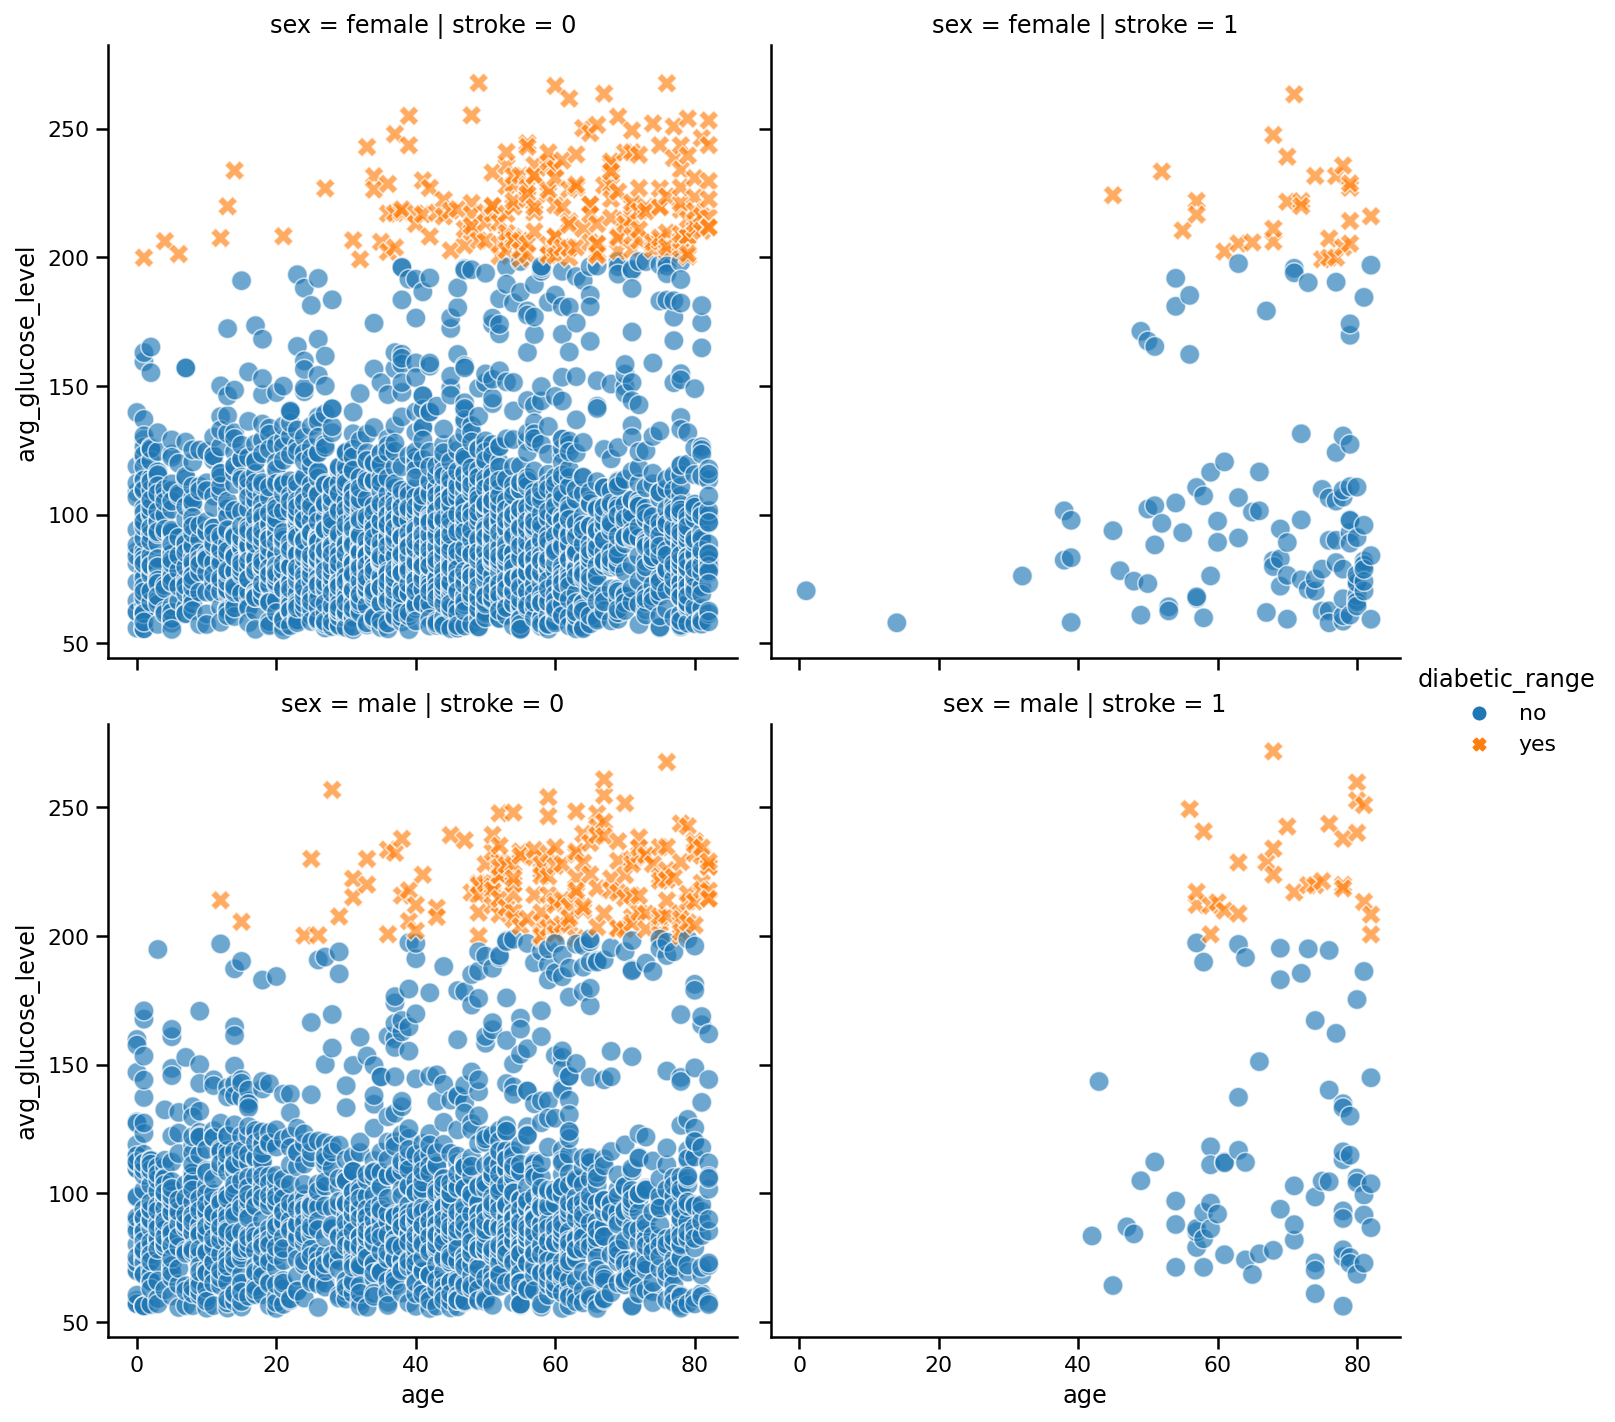

In [69]:
(sns.relplot(
    data=df_copy,
    x="age", y='avg_glucose_level', 
    hue="diabetic_range", style="diabetic_range", col="stroke", row='sex',
    s=100, alpha = 0.65))
plt.show()

In [70]:
print(f'PERCENTAGE OF DATASET THAT ARE DIABETIC: {(df_copy.diabetic_range == "yes").mul(100).mean():.2f}%')
print(f'STROKE AND DIABETIC: {((df_copy.stroke == 1)&(df_copy.diabetic_range == "yes")).mul(100).mean():.2f}%')
print(f'NO STROKE AND DIABETIC: {((df_copy.stroke == 0)&(df_copy.diabetic_range == "yes")).mul(100).mean():.2f}%')
print(f'STROKE AND NOT DIABETIC: {((df_copy.stroke == 1)&(df_copy.diabetic_range == "no")).mul(100).mean():.2f}%')

PERCENTAGE OF DATASET THAT ARE DIABETIC: 8.70%
STROKE AND DIABETIC: 1.16%
NO STROKE AND DIABETIC: 7.54%
STROKE AND NOT DIABETIC: 3.72%


#### STROKE AND DIABETES ANALYSIS:

- We have a higher proportion of older adults with diabetes however the presence of diabetes does not seem to correlate with stroke 
- Only 1.16% of diabetics had a stroke, whereas 3.72% of those who experienced stroke were not diabetic
- The majority of diabetics did not experienced stroke (7.54%)

#### HEATMAPS FROM CONTINGENCY TABLES TO VIEW BINARY NOMINAL VARIABLES:

- Rather than view binary nominals in a heatmap, I decided to use a contingency table 
- This allows visualization of each of the variables as a percentage within the stroke and non stroke categories

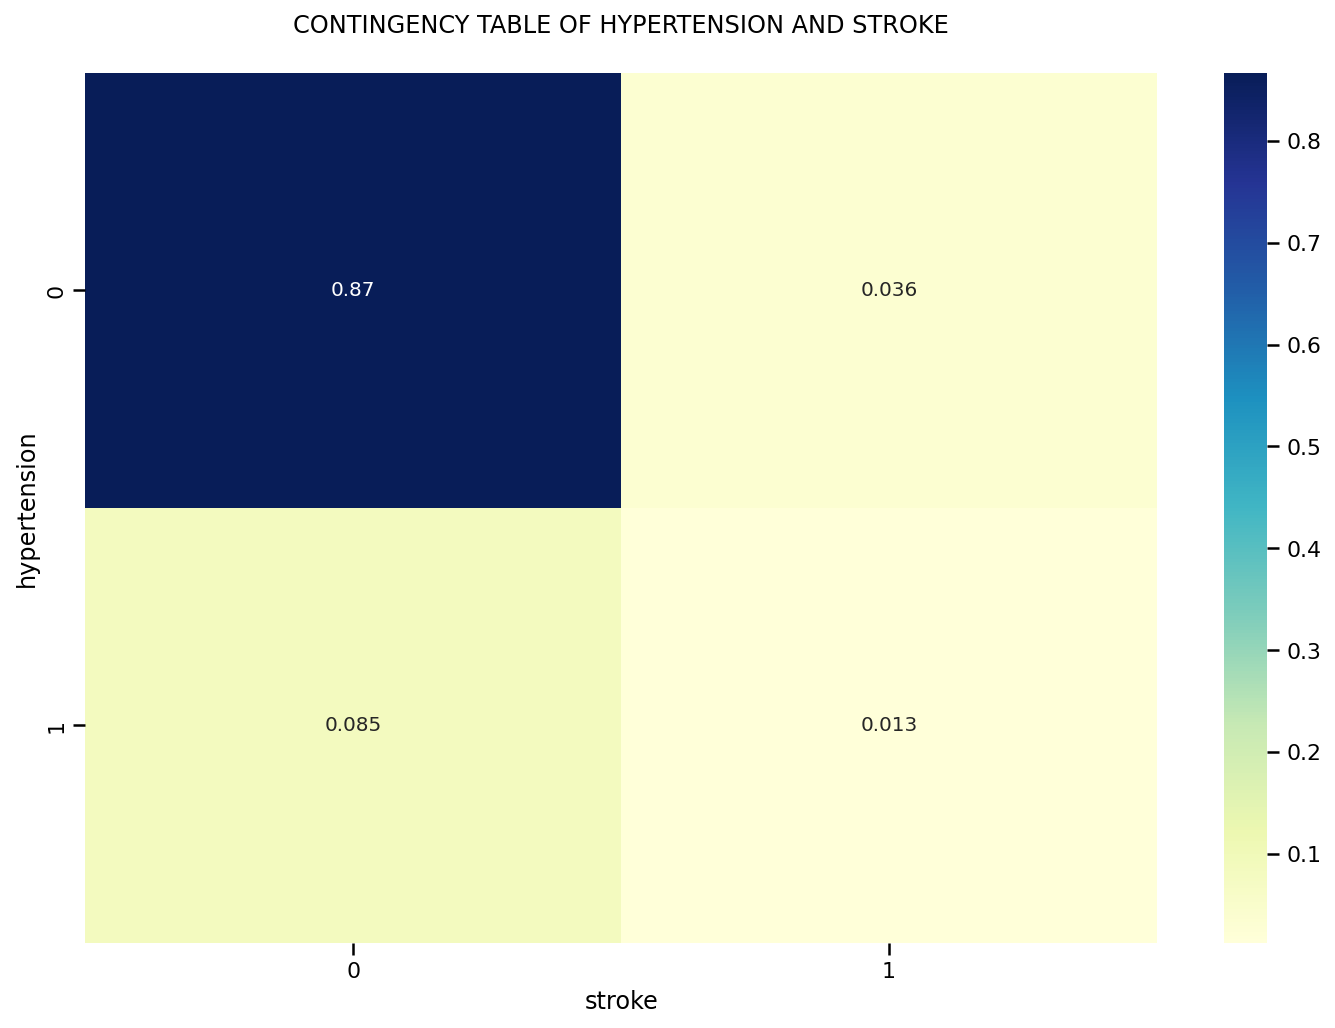

In [72]:
contingency_ht= pd.crosstab(df['hypertension'], df['stroke'], normalize='all')
contingency_ht
plt.figure(figsize=(12,8))

sns.heatmap(contingency_ht, annot=True, cmap="YlGnBu")
plt.title('CONTINGENCY TABLE OF HYPERTENSION AND STROKE\n')
plt.show()

In [124]:
print(f'STROKE AND HYPERTENSION: {((df_copy.stroke == 1)&(df_copy.hypertension ==1)).mul(100).mean():.2f}%')
print(f'NO STROKE AND HYPERTENSION: {((df_copy.stroke == 0)&(df_copy.hypertension ==1)).mul(100).mean():.2f}%')
print(f'STROKE AND NO HYPERTENSION: {((df_copy.stroke == 1)&(df_copy.hypertension ==0)).mul(100).mean():.2f}%')
print(f'NO STROKE AND NO HYPERTENSION: {((df_copy.stroke == 0)&(df_copy.hypertension ==0)).mul(100).mean():.2f}%')

STROKE AND HYPERTENSION: 1.29%
NO STROKE AND HYPERTENSION: 8.41%
STROKE AND NO HYPERTENSION: 3.59%
NO STROKE AND NO HYPERTENSION: 86.72%


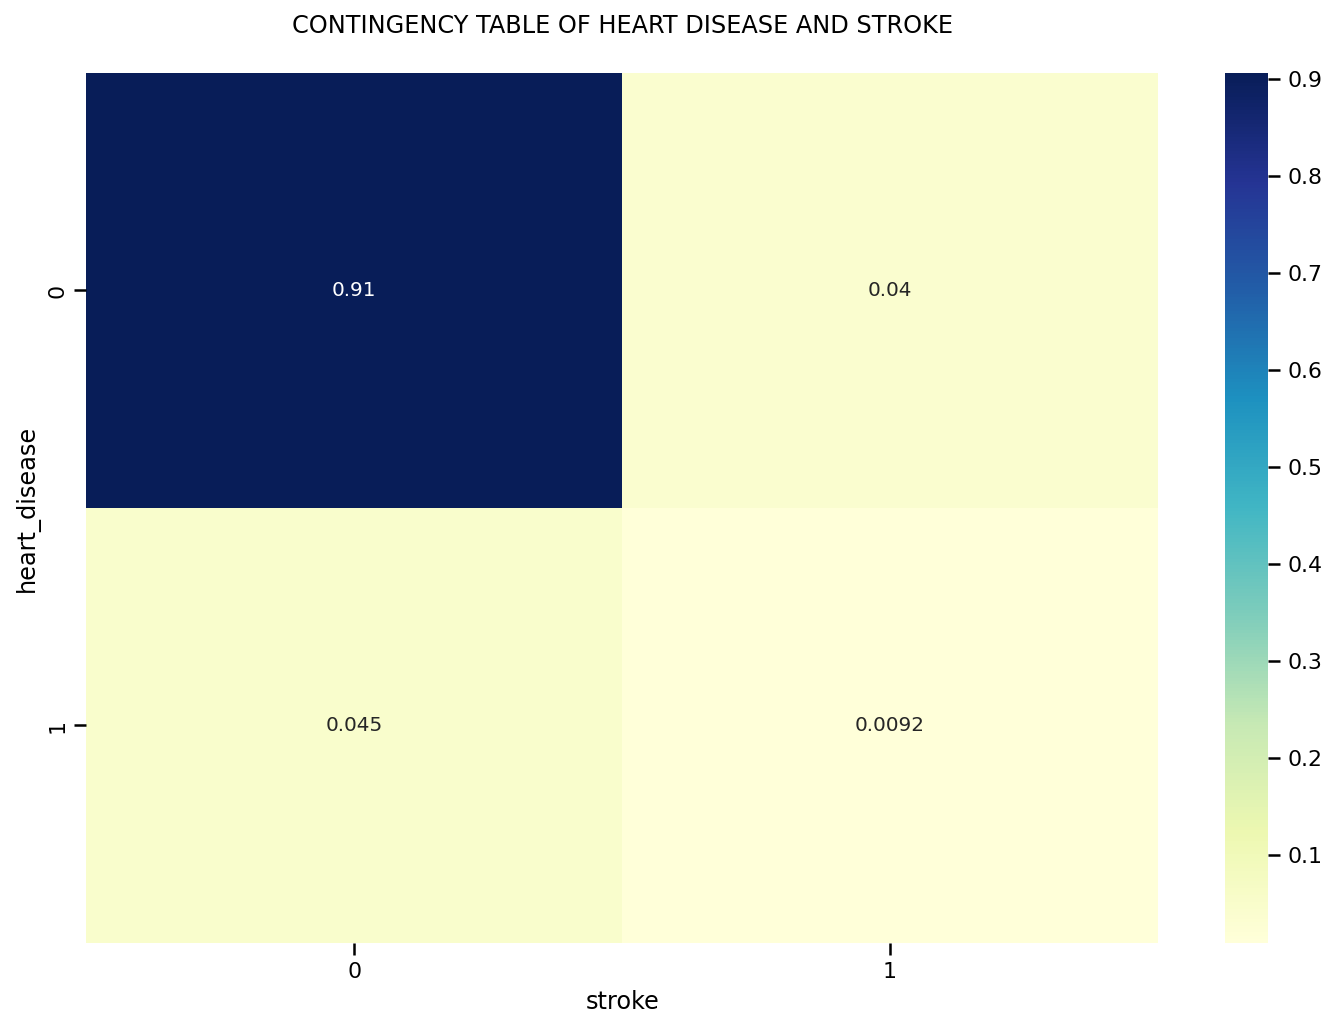

In [126]:
contigency_hd= pd.crosstab(df['heart_disease'], df['stroke'], normalize='all')
plt.figure(figsize=(12,8))
sns.heatmap(contigency_hd, annot=True, cmap="YlGnBu")
plt.title('CONTINGENCY TABLE OF HEART DISEASE AND STROKE\n')
plt.show()

In [128]:
print(f'STROKE WITH HEART DISEASE: {((df_copy.stroke == 1)&(df_copy.heart_disease ==1)).mul(100).mean():.2f}%')
print(f'STROKE NO HEART DISEASE: {((df_copy.stroke == 1)&(df_copy.heart_disease ==0)).mul(100).mean():.2f}%')
print(f'NO STROKE WITH HEART DISEASE: {((df_copy.stroke == 0)&(df_copy.heart_disease ==1)).mul(100).mean():.2f}%')
print(f'NO STROKE NO HEART DISEASE: {((df_copy.stroke == 0)&(df_copy.heart_disease ==0)).mul(100).mean():.2f}%')

STROKE WITH HEART DISEASE: 0.92%
STROKE NO HEART DISEASE: 3.96%
NO STROKE WITH HEART DISEASE: 4.49%
NO STROKE NO HEART DISEASE: 90.63%


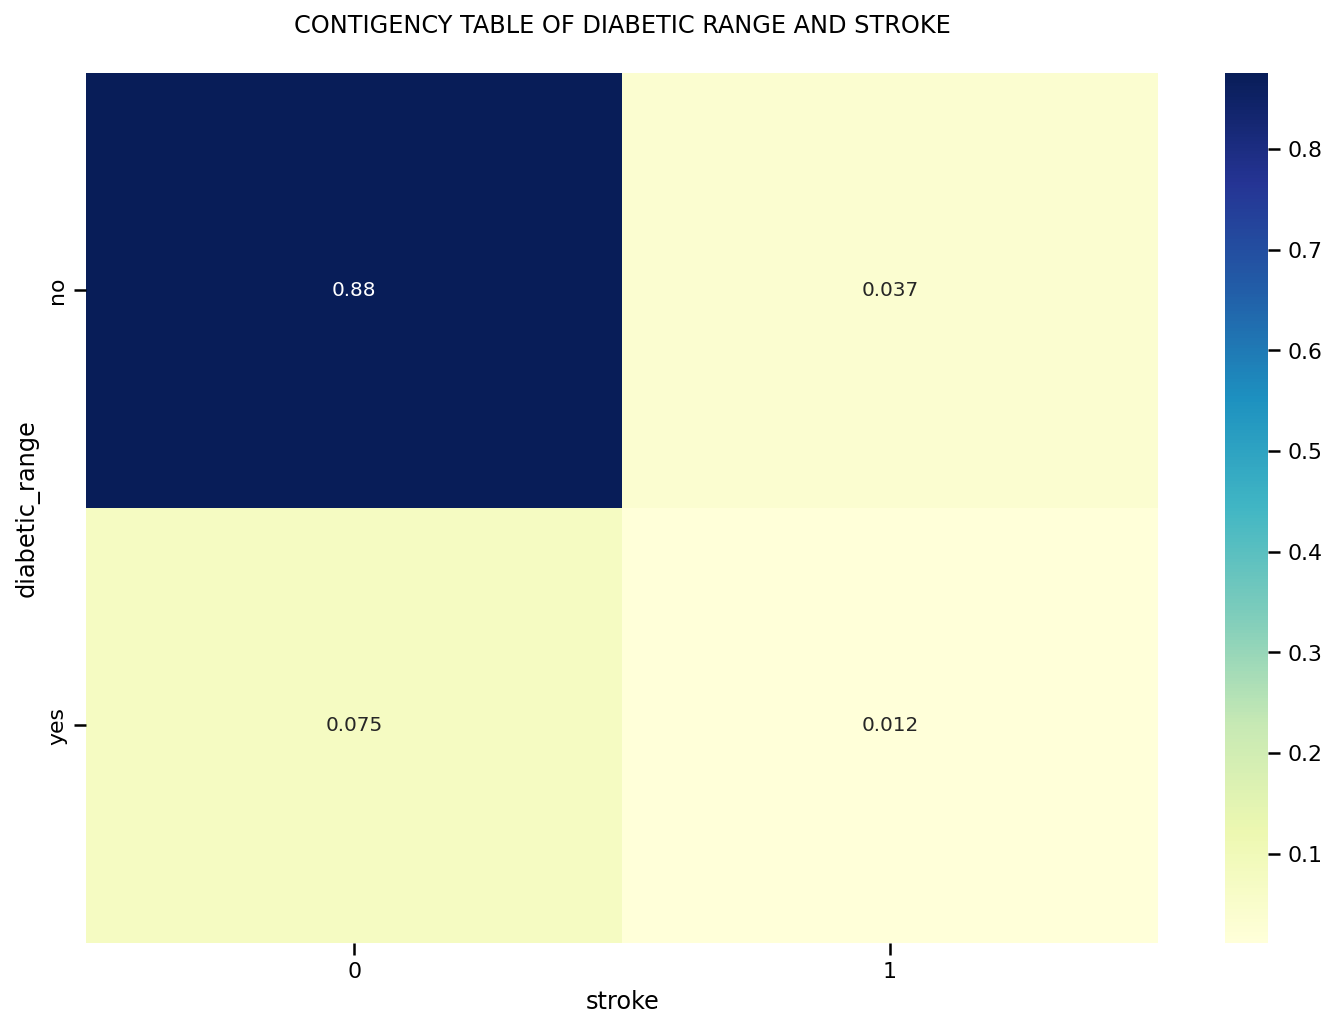

In [129]:
contigency_diab= pd.crosstab(df_copy['diabetic_range'], df_copy['stroke'], normalize='all')
plt.figure(figsize=(12,8))
sns.heatmap(contigency_diab, annot=True, cmap="YlGnBu")
plt.title('CONTIGENCY TABLE OF DIABETIC RANGE AND STROKE\n')
plt.show()

In [131]:
print(f'STROKE AND DIABETIC: {((df_copy.stroke == 1)&(df_copy.diabetic_range=="yes")).mul(100).mean():.2f}%')
print(f'STROKE NOT DIABETIC: {((df_copy.stroke == 1)&(df_copy.diabetic_range =="no")).mul(100).mean():.2f}%')
print(f'NO STROKE AND DIABETIC: {((df_copy.stroke == 0)&(df_copy.diabetic_range =="yes")).mul(100).mean():.2f}%')
print(f'NO STROKE NOT DIABETIC: {((df_copy.stroke == 0)&(df_copy.diabetic_range =="no")).mul(100).mean():.2f}%')

STROKE AND DIABETIC: 1.16%
STROKE NOT DIABETIC: 3.72%
NO STROKE AND DIABETIC: 7.54%
NO STROKE NOT DIABETIC: 87.58%


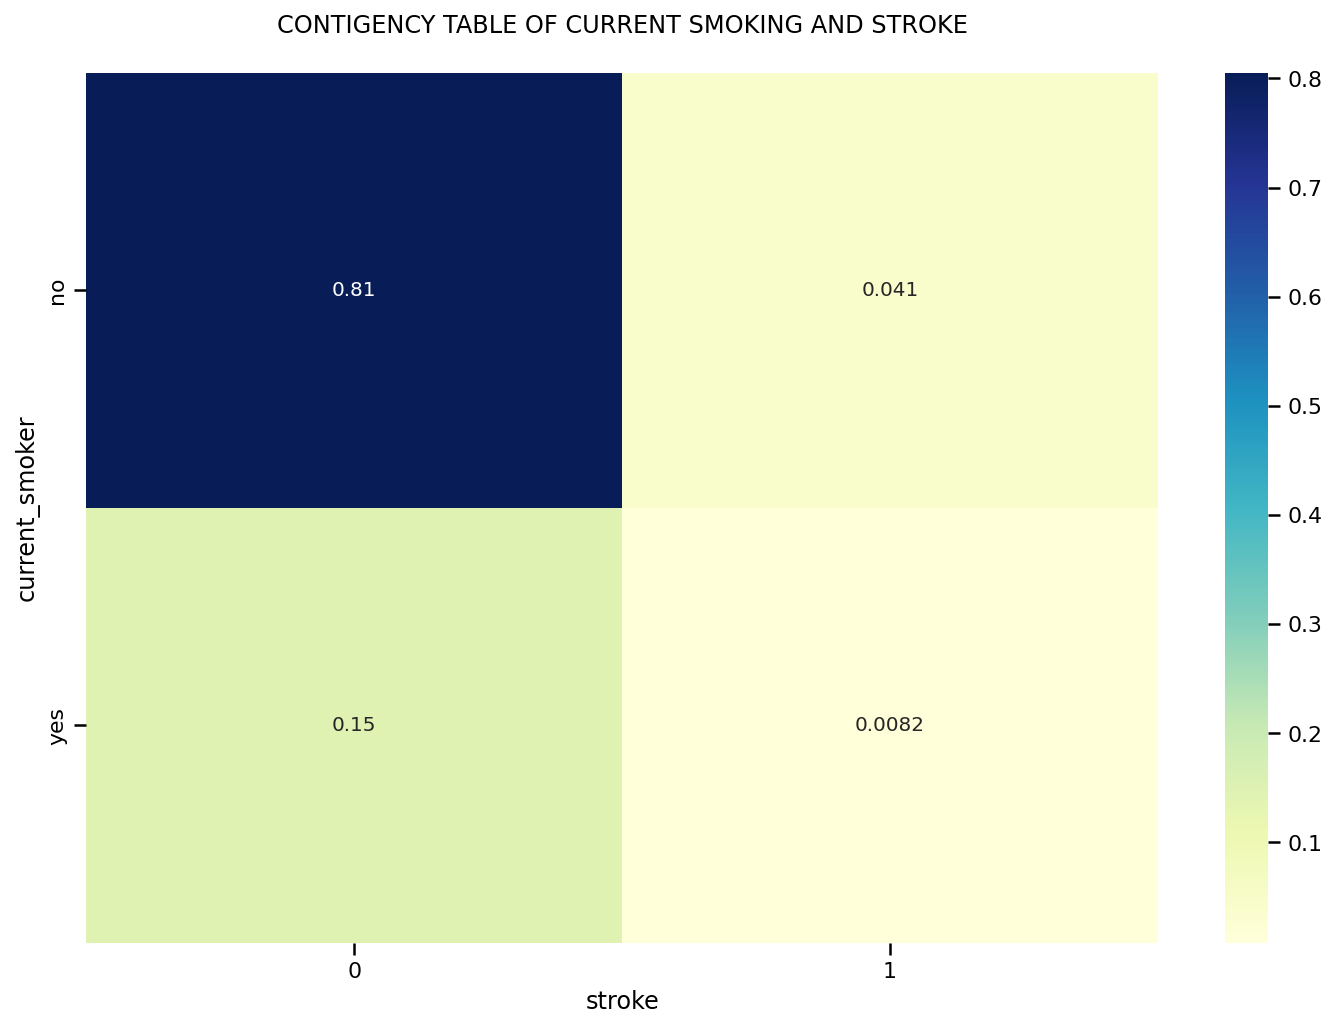

In [132]:
#Smoking and stroke
contigency_smokes= pd.crosstab(df_copy['current_smoker'], df_copy['stroke'], normalize='all')
contigency_smokes
plt.figure(figsize=(12,8))
sns.heatmap(contigency_smokes, annot=True, cmap="YlGnBu")
plt.title('CONTIGENCY TABLE OF CURRENT SMOKING AND STROKE\n')
plt.show()

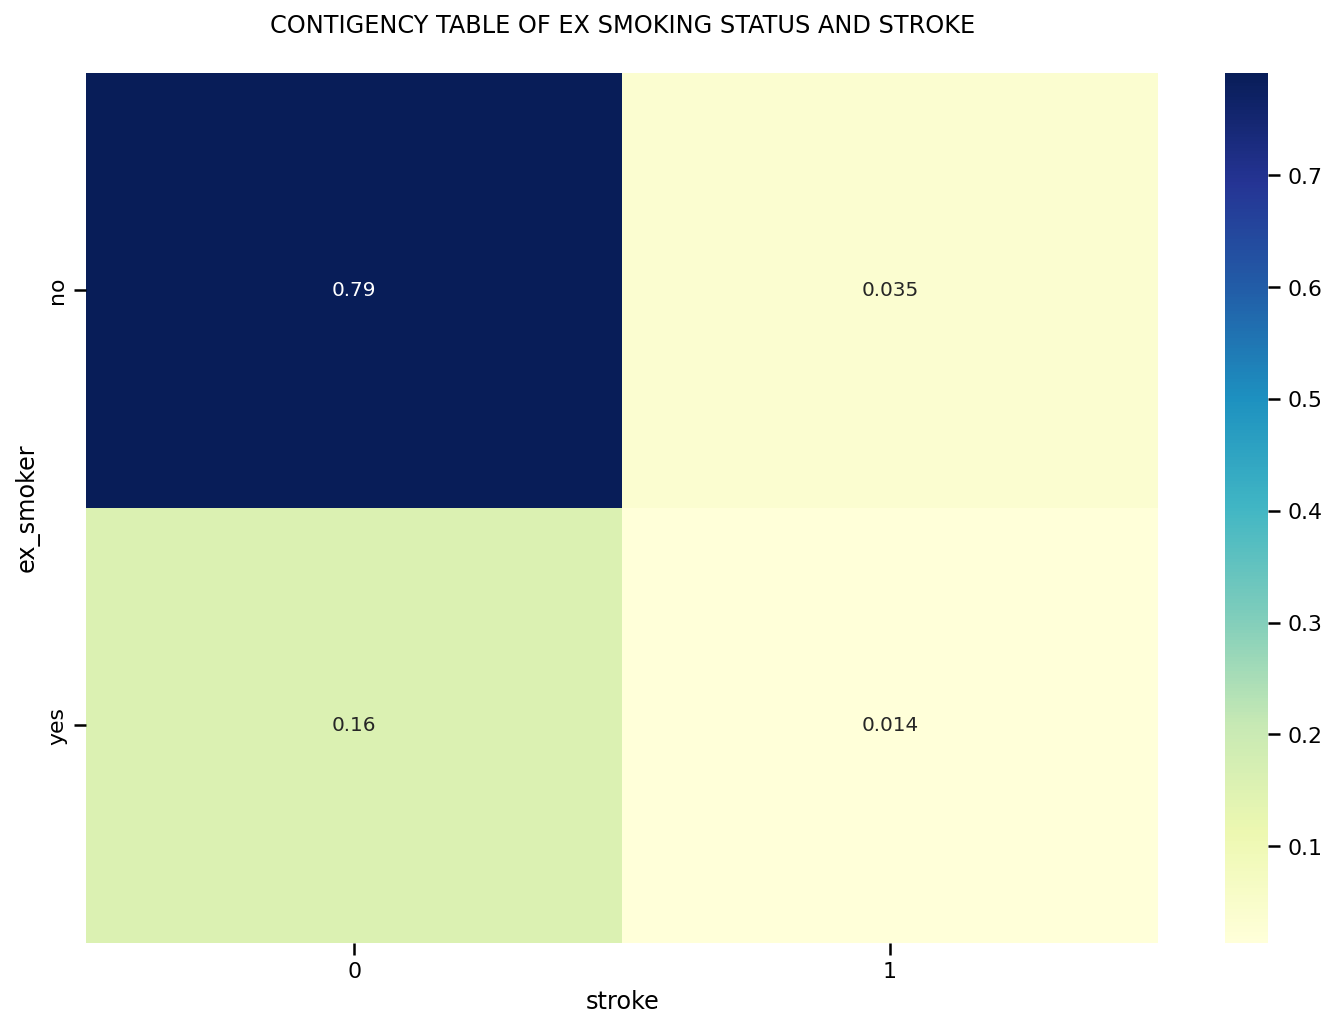

In [133]:
#Ex-smoking and stroke
contigency_ex_smokes= pd.crosstab(df_copy['ex_smoker'], df_copy['stroke'], normalize='all')
contigency_ex_smokes
plt.figure(figsize=(12,8))
sns.heatmap(contigency_ex_smokes, annot=True, cmap="YlGnBu")
plt.title('CONTIGENCY TABLE OF EX SMOKING STATUS AND STROKE\n')
plt.show()

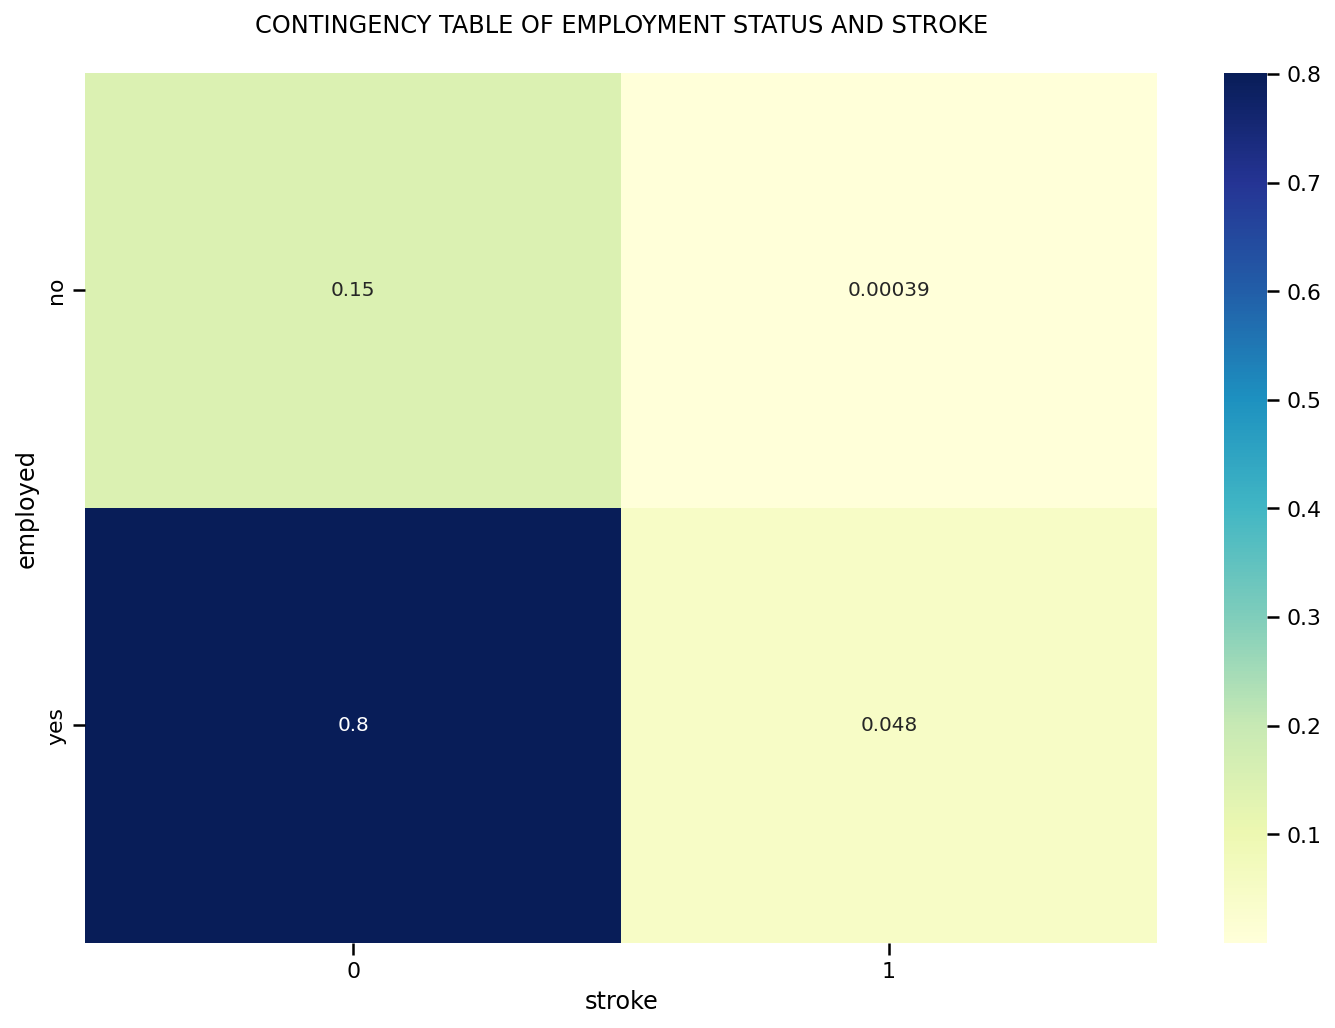

In [134]:
contigency_emp= pd.crosstab(df_copy['employed'], df_copy['stroke'], normalize='all')
contigency_emp
plt.figure(figsize=(12,8))
sns.heatmap(contigency_emp, annot=True, cmap="YlGnBu")
plt.title('CONTINGENCY TABLE OF EMPLOYMENT STATUS AND STROKE\n')
plt.show()

### SUMMARY:

- The only clear correlation with stroke that is visible so far is that prevalence of stroke increases with age
- The data shows that increase BMI and diabtes are more common in older adults, but this did not appear to correlate to stroke

##### ISSUES THAT I THINK MAY HAVE AFFECTED THE DATA QUALITY: 

- Small data set, with very few people who have had a stroke
- We do not know if the age recorded is for the age of having a stroke or the age the person was when the data was collected
- No info on ethnicity, which has a correlation to risk of stroke, so it may be difficult to apply the results to a mixed population without the risk of over or underestimating risk of for different ethnic groups
- The data cuts off at age 82, and most strokes in females occur between 80-89 yo, so we are going to miss a large percentage of those at risk
- The BMI data was missing values which I filled, however I think maybe weight in kg's has been recorded instead of BMI in some instances. This may account for the high outliers and relatively large amount of underweight children and infants in the data
- BMI can be misleading as a proxy for health, as fit individuals with high muscle mass can be classed as overweight or obese. Body fat would be a better measure and indicator for future health outcomes 
- The ABG measurements are not indicative of whether they are random, post prandial or fasting (as all have different cutoffs)
- A large proportion of the data did not have their smoking status recorded, so it may be difficult to make any correlations between smoking and stroke from this data

#### FURTHER INFO:

- I am yet to complete the machine learning part of the bootcamp I am undertaking 
- My next steps are to finish preparing the data set for machine learning
- I will use this data set to build a model and am keen to see if accurate predictions can be made based on the data